# Table of Contents

1. [Installing Dependencies](#1)
2. [Downloading Dataset](#2)
3. [Data Cleaning](#3)
4. [Data Processing](#4)
5. [Analyzing Dataset and Potential Issues in Optimization](#5)
6. [Data Analysis](#6)
7. [Data Analysis After Processing](#7)
8. [Population Initialization](#8)
9. [Defining Fitness Function](#9)
10. [Advanced Evolutionary Strategies (ES)](#10)
11. [Version 1: Basic Evolutionary Programming (EP)](#11)
12. [Version 2: Advanced EP](#12)
13. [Version 3: Evolutionary Programming (ES)](#13)
14. [Version 4: Advanced ES](#14)
15. [Version 5: \((\mu + \lambda)\) Evolutionary Strategies](#15)
16. [Version 6: \((\mu, \lambda)\) Evolutionary Strategies](#16)

## <a name="1"></a> 1 Installing Dependencies

In [ ]:
!pip install pandas-datareader

In [ ]:
!pip install --upgrade pandas-datareader

In [ ]:
!pip install yfinance

In [ ]:
# Import dependecies:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import yfinance as yf
from datetime import datetime
import numpy as np
import time

## <a name="2"></a> 2 Downloading Dataset


In [ ]:

tickers = ["IBM", "AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "HOLO", "STLA", "CCL", "XHG", "TDOC", "FUTU", "STTK", "CGC", "DUO", "ZKIN", "EOSE", "MLGO", "TLRY"]
data = yf.download(tickers, start=datetime(2018, 1, 1), end=datetime(2022, 12, 31))
print(data['Adj Close'])

[*********************100%***********************]  20 of 20 completed


Ticker                           AAPL       AMZN        CCL         CGC  \
Date                                                                      
2018-01-02 00:00:00+00:00   40.524345  59.450500  61.440407  258.799988   
2018-01-03 00:00:00+00:00   40.517288  60.209999  61.578472  286.500000   
2018-01-04 00:00:00+00:00   40.705490  60.479500  61.532448  258.899994   
2018-01-05 00:00:00+00:00   41.168930  61.457001  61.026203  273.899994   
2018-01-08 00:00:00+00:00   41.016018  62.343498  60.796093  321.100006   
...                               ...        ...        ...         ...   
2022-12-23 00:00:00+00:00  130.487808  85.250000   7.810000   23.299999   
2022-12-27 00:00:00+00:00  128.676849  83.040001   7.670000   20.900000   
2022-12-28 00:00:00+00:00  124.728363  81.820000   7.670000   21.900000   
2022-12-29 00:00:00+00:00  128.261215  84.180000   8.080000   22.799999   
2022-12-30 00:00:00+00:00  128.577866  84.000000   8.060000   23.100000   

Ticker                  

## <a name="3"></a> 3 Data Cleaning


In [ ]:
# Create an empty list to store DataFrames for each ticker
dfs = []

# Process data for each ticker
for ticker in tickers:
    # Select data for this ticker
    ticker_data = data.xs(ticker, axis=1, level=1)

    # Reset the index to make the date a column
    ticker_data = ticker_data.reset_index()

    # Add a column for the ticker symbol
    ticker_data['Ticker'] = ticker

    # Reorder columns to put Ticker and Date first
    cols = ticker_data.columns.tolist()
    cols = ['Ticker', 'Date'] + [col for col in cols if col not in ['Ticker', 'Date']]
    ticker_data = ticker_data[cols]

    # Append to our list of DataFrames
    dfs.append(ticker_data)

# Concatenate all DataFrames
final_df = pd.concat(dfs, ignore_index=True)

# Sort by Ticker and Date
final_df = final_df.sort_values(['Ticker', 'Date'])

# Display the first few rows of the DataFrame
print(final_df.head(15))

Price Ticker                      Date  Adj Close      Close       High  \
1259    AAPL 2018-01-02 00:00:00+00:00  40.524345  43.064999  43.075001   
1260    AAPL 2018-01-03 00:00:00+00:00  40.517288  43.057499  43.637501   
1261    AAPL 2018-01-04 00:00:00+00:00  40.705490  43.257500  43.367500   
1262    AAPL 2018-01-05 00:00:00+00:00  41.168930  43.750000  43.842499   
1263    AAPL 2018-01-08 00:00:00+00:00  41.016018  43.587502  43.902500   
1264    AAPL 2018-01-09 00:00:00+00:00  41.011318  43.582500  43.764999   
1265    AAPL 2018-01-10 00:00:00+00:00  41.001904  43.572498  43.575001   
1266    AAPL 2018-01-11 00:00:00+00:00  41.234798  43.820000  43.872501   
1267    AAPL 2018-01-12 00:00:00+00:00  41.660614  44.272499  44.340000   
1268    AAPL 2018-01-16 00:00:00+00:00  41.448872  44.047501  44.847500   
1269    AAPL 2018-01-17 00:00:00+00:00  42.133453  44.775002  44.812500   
1270    AAPL 2018-01-18 00:00:00+00:00  42.171104  44.814999  45.025002   
1271    AAPL 2018-01-19 0

In [ ]:
final_df = final_df.sort_values(['Ticker', 'Date'])
final_df = final_df.reset_index(drop=True)
final_df.shape

(25180, 8)

In [ ]:
# Modify the resampling and sorting:
# 1. Get monthly data
monthly_data = data['Adj Close'].resample('M').last()

# 2. Reset index to get Date as column
monthly_data = monthly_data.reset_index()

# 3. Format date properly
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])  # Ensure proper datetime
monthly_data['Date'] = monthly_data['Date'].dt.strftime('%Y-%m')  # Format as YYYY-MM

# 4. Sort chronologically
monthly_data = monthly_data.sort_values('Date')  # Sort ascending by date

# 5. Reset index
monthly_data = monthly_data.reset_index(drop=True)

# 6. Print check
print("Data Shape:", monthly_data.shape)
print("\nFirst few rows:")
print(monthly_data.head())
print("\nLast few rows:")
print(monthly_data.tail())

# 7. Verify date sequence
print("\nVerifying date sequence:")
dates = monthly_data['Date'].values
is_sorted = all(dates[i] <= dates[i+1] for i in range(len(dates)-1))
print(f"Dates in proper sequence: {is_sorted}")

Data Shape: (60, 21)

First few rows:
Ticker     Date       AAPL       AMZN        CCL         CGC  DUO  EOSE  FUTU  \
0       2018-01  39.388081  72.544502  65.913818  252.029999  NaN   NaN   NaN   
1       2018-02  42.073753  75.622498  61.988594  213.199997  NaN   NaN   NaN   
2       2018-03  39.631344  72.366997  60.756409  261.230011  NaN   NaN   NaN   
3       2018-04  39.036098  78.306503  58.421768  234.399994  NaN   NaN   NaN   
4       2018-05  44.310818  81.481003  58.148647  283.700012  NaN   NaN   NaN   

Ticker      GOOGL  HOLO  ...        META  MLGO       MSFT       STLA  STTK  \
0       58.964993   NaN  ...  186.328979   NaN  88.203918  14.081345   NaN   
1       55.059662   NaN  ...  177.784729   NaN  87.461662  12.345211   NaN   
2       51.728909   NaN  ...  159.310318   NaN  85.129845  11.954870   NaN   
3       50.803204   NaN  ...  171.483673   NaN  87.228462  12.718072   NaN   
4       54.864151   NaN  ...  191.204315   NaN  92.590149  13.533707   NaN   

Ticker

## <a name="4"></a> 4 Data Processing


In [ ]:
# Step 1: Remove rows where NaN exists in the 'Date' column
df_monthly = monthly_data.dropna(subset=['Date'])
df_monthly = df_monthly.dropna()
df_monthly.shape

(17, 21)

In [ ]:
df_monthly.head(4)

Ticker,Date,AAPL,AMZN,CCL,CGC,DUO,EOSE,FUTU,GOOGL,HOLO,...,META,MLGO,MSFT,STLA,STTK,TDOC,TLRY,TSLA,XHG,ZKIN
43,2021-08,149.165268,173.539505,24.139999,172.300003,348.75,12.92,95.190002,144.340073,1970.000000,...,378.241180,99.599998,294.299194,15.899352,21.129999,144.419998,13.69,245.240005,3084.399902,3.59
44,2021-09,139.016586,164.251999,25.010000,138.600006,249.75,14.03,91.019997,133.345810,1982.000000,...,338.371216,100.199997,274.840454,15.168713,20.379999,126.809998,11.29,258.493347,2680.000000,2.79
45,2021-10,147.170914,168.621506,22.160000,126.300003,240.75,10.55,53.520000,147.680328,1999.400024,...,322.598694,100.650002,323.292358,15.835818,19.299999,149.589996,10.30,371.333344,3184.399902,2.75
46,2021-11,162.635925,175.353500,17.620001,107.099998,146.25,9.95,47.490002,141.547028,1996.000000,...,323.485992,100.449997,322.877808,13.604190,8.480000,101.250000,10.12,381.586670,1680.000000,2.07


## <a name="5"></a> 5 Analyzing Dataset and Potential Issues in Optimization


In [ ]:
def analyze_price_ranges():
    """Analyze price ranges and identify potential issues"""
    for column in monthly_data.columns:
        if column != 'Date':
            prices = monthly_data[column]
            print(f"\n{column}:")
            print(f"Min: {prices.min():.2f}")
            print(f"Max: {prices.max():.2f}")
            print(f"Mean: {prices.mean():.2f}")
            print(f"Std: {prices.std():.2f}")
            print(f"Max/Min Ratio: {prices.max()/prices.min():.2f}")

def check_returns():
    """Calculate and check returns for extreme values"""
    returns = monthly_data.drop('Date', axis=1).pct_change()

    for column in returns.columns:
        ret = returns[column]
        print(f"\n{column} Returns:")
        print(f"Min: {ret.min():.2%}")
        print(f"Max: {ret.max():.2%}")
        print(f"Mean: {ret.mean():.2%}")
        print(f"Std: {ret.std():.2%}")

In [ ]:
# Call the functions
print("Price Range Analysis:")
analyze_price_ranges()

print("\nReturns Analysis:")
check_returns()

Price Range Analysis:

AAPL:
Min: 37.67
Max: 174.71
Mean: 96.29
Std: 46.70
Max/Min Ratio: 4.64

AMZN:
Min: 72.37
Max: 175.35
Mean: 119.57
Std: 35.16
Max/Min Ratio: 2.42

CCL:
Min: 7.03
Max: 65.91
Mean: 32.34
Std: 18.24
Max/Min Ratio: 9.38

CGC:
Min: 23.10
Max: 505.20
Mean: 221.19
Std: 132.32
Max/Min Ratio: 21.87

DUO:
Min: 11.53
Max: 3492.00
Mean: 1080.63
Std: 1095.71
Max/Min Ratio: 302.73

EOSE:
Min: 1.06
Max: 22.35
Mean: 9.54
Std: 7.71
Max/Min Ratio: 21.08

FUTU:
Min: 9.47
Max: 179.09
Mean: 48.56
Std: 45.20
Max/Min Ratio: 18.91

GOOGL:
Min: 50.80
Max: 147.68
Mean: 85.37
Std: 30.64
Max/Min Ratio: 2.91

HOLO:
Min: 432.00
Max: 2044.00
Mean: 1647.85
Std: 667.68
Max/Min Ratio: 4.73

IBM:
Min: 82.83
Max: 137.98
Mean: 106.49
Std: 11.59
Max/Min Ratio: 1.67

META:
Min: 92.88
Max: 378.24
Mean: 216.64
Std: 68.49
Max/Min Ratio: 4.07

MLGO:
Min: 12.50
Max: 103.55
Mean: 96.72
Std: 19.36
Max/Min Ratio: 8.28

MSFT:
Min: 85.13
Max: 328.47
Mean: 188.82
Std: 75.20
Max/Min Ratio: 3.86

STLA:
Min: 4.86
M

## <a name="6"></a> 6 Data Analysis
The dataset shows extreme heterogeneity among the 20 stocks, with Max/Min price ratios ranging from 1.67 (IBM) to 302.73 (DUO). This creates several challenges for EP/ES optimization: First, the wide disparity in price scales (e.g., XHG: max 58,880.00 vs ZKIN: min 0.41) can cause numerical instability in the algorithms, making it difficult to find optimal solutions. Second, the extreme return variations (e.g., TLRY: 195.02% max return, MLGO: -87.14% min return) can mislead the evolutionary process, causing premature convergence to suboptimal solutions or getting stuck in local optima. For EP/ES specifically, these extreme values can disrupt the mutation and recombination operators, as large mutations might be needed for high-value stocks but would be destructive for low-value ones. The high volatility stocks (like DUO, XHG, TLRY) can dominate the fitness function, making it harder for the algorithms to recognize good solutions for more stable stocks.

In [ ]:
def process_monthly_data(df_monthly):
    """
    Process monthly data with improved normalization and return scaling
    """
    # Create copy to avoid modifying original data
    normalized_prices = df_monthly.copy()

    # Step 1: Normalize stocks with outlier handling
    for column in normalized_prices.columns:
        if column != 'Date':
            # Handle outliers using IQR
            Q1 = normalized_prices[column].quantile(0.25)
            Q3 = normalized_prices[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            normalized_prices[column] = normalized_prices[column].clip(lower=lower_bound, upper=upper_bound)
            # Normalize to 100
            first_value = normalized_prices[column].iloc[0]
            normalized_prices[column] = 100 * (normalized_prices[column] / first_value)

    # Step 2: Calculate and scale returns with improved scaling
    returns = normalized_prices.drop('Date', axis=1).pct_change()
    # Use softer scaling (dividing by 2 makes scaling more conservative)
    #scaled_returns = returns.apply(lambda x: np.tanh(x/2))
    scaled_returns = returns.apply(lambda x: np.tanh(x/4))  # More conservative scaling
    scaled_returns['Date'] = normalized_prices['Date']

    # Print summary statistics
    print("Summary Statistics After Processing:")
    print("\nNormalized Prices Statistics:")
    print(normalized_prices.describe())
    print("\nScaled Returns Statistics:")
    print(scaled_returns.describe())

    return normalized_prices, scaled_returns

def verify_processing(original, normalized, scaled_returns):
    """
    Verify the data processing results with additional checks
    """
    print("\nVerification Results:")

    # Check normalization
    first_values = normalized.iloc[0]
    print("\nFirst values after normalization (should be 100):")
    print(first_values.drop('Date'))

    # Check return scaling
    print("\nReturn scaling bounds (should be within [-0.5, 0.5] after softer scaling):")
    for column in scaled_returns.columns:
        if column != 'Date':
            print(f"{column}:")
            print(f"Min: {scaled_returns[column].min():.4f}")
            print(f"Max: {scaled_returns[column].max():.4f}")
            print(f"Std: {scaled_returns[column].std():.4f}")

# Process and verify data
normalized_df_monthly, scaled_monthly_returns = process_monthly_data(df_monthly)
verify_processing(df_monthly, normalized_df_monthly, scaled_monthly_returns)

# Store results
df_monthly_normalized = normalized_df_monthly
df_monthly_returns = scaled_monthly_returns

print("\nProcessed DataFrames shape:")
print(f"Normalized prices shape: {df_monthly_normalized.shape}")
print(f"Scaled returns shape: {df_monthly_returns.shape}")

Summary Statistics After Processing:

Normalized Prices Statistics:
Ticker        AAPL        AMZN         CCL         CGC         DUO  \
count    17.000000   17.000000   17.000000   17.000000   17.000000   
mean    102.339233   78.741810   63.804281   42.084207   38.422346   
std       9.123848   17.199858   25.986577   26.433883   33.912151   
min      86.198260   48.403964   29.121791   14.089661    5.244672   
25%      98.206214   65.114857   37.531071   22.079902   12.617221   
50%     101.560482   77.763272   71.665284   34.827689   28.644501   
75%     109.030693   94.648189   83.761391   53.247941   47.570332   
max     117.123887  101.045292  103.603980  100.000000  100.000000   

Ticker        EOSE        FUTU       GOOGL        HOLO         IBM  \
count    17.000000   17.000000   17.000000   17.000000   17.000000   
mean     37.283737   62.848674   83.880948  100.643177  101.299652   
std      34.059935   17.506838   13.858840    2.447466    7.861252   
min       8.204334   

## <a name="7"></a> 7 Data Analysis After Processing
The data processing shows significant improvements in both normalized prices and scaled returns. Initially, stocks like EOSE, DUO, and XHG showed extreme variations with returns reaching beyond ±0.5, which could destabilize the optimization process. After applying more conservative scaling (tanh(x/4)), the returns have been effectively compressed into more manageable ranges. Most stocks now exhibit returns within ±0.1, with stable stocks like AAPL (-0.0306 to 0.0471), MSFT (-0.0273 to 0.0440), and GOOGL (-0.0448 to 0.0269) showing particularly well-behaved ranges. While a few stocks (EOSE, DUO, XHG) still show slightly higher variations, their scaled returns are now much more contained compared to the original data, with standard deviations generally below 0.08. The normalized prices all start correctly at 100, ensuring a common baseline, while maintaining their relative price movements. This improved scaling should facilitate better EP/ES optimization by: (1) preventing extreme values from dominating the fitness calculations, (2) allowing mutation and recombination operators to work more effectively with similarly-scaled values across all stocks, and (3) maintaining meaningful relationships between stock returns while controlling for outliers that could disrupt the evolutionary process. The reduced range of values will help the algorithms converge more stably and produce more balanced portfolio weights.

In [ ]:
def hist_return(months):
    ''' Calculate Stock returns using processed normalized data
        Input: Months in the form of a list.
        Output: Historical returns in the form of a DataFrame. '''
    idx = []
    df = pd.DataFrame()

    for mon in months:
        # Calculate returns using normalized prices
        temp = (df_monthly_normalized.iloc[0,1:] - df_monthly_normalized.iloc[mon,1:])/(df_monthly_normalized.iloc[mon,1:])

        # Apply scaling using numpy's tanh
        temp = temp.apply(lambda x: np.tanh(x/4))

        idx.append(str(mon)+'_mon_return')
        df = pd.concat([df, temp.to_frame().T], ignore_index=True)

    df.index = idx

    # Verify the calculations
    print("\nReturn Statistics:")
    print("Min Return:", df.min().min())
    print("Max Return:", df.max().max())
    print("Mean Return:", df.mean().mean())
    print("Std Return:", df.std().mean())

    return df

# Example usage:
hist_stock_returns = hist_return([1,4,8,12,15])
print("\nHistorical Returns Shape:", hist_stock_returns.shape)
print("\nFirst few columns of returns:")
print(hist_stock_returns.head())


Return Statistics:
Min Return: -0.07580670796419671
Max Return: 0.9934157433778924
Mean Return: 0.20469829474550877
Std Return: 0.17090025947075663

Historical Returns Shape: (5, 20)

First few columns of returns:
Ticker             AAPL      AMZN       CCL       CGC       DUO      EOSE  \
1_mon_return   0.018249  0.014135 -0.008696  0.045693  0.000000 -0.019776   
4_mon_return  -0.036535  0.010230  0.049909  0.216043  0.268770  0.177617   
8_mon_return  -0.009886  0.098763  0.098523  0.436436  0.553052  0.854766   
12_mon_return -0.009916  0.091972  0.369591  0.698206  0.939223  0.866276   
15_mon_return  0.004566  0.196797  0.343234  0.707545  0.993416  0.992590   

Ticker             FUTU     GOOGL      HOLO       IBM      META      MLGO  \
1_mon_return   0.000000  0.020609 -0.001514  0.002537  0.029449 -0.001497   
4_mon_return   0.178718 -0.000267 -0.002761 -0.002354  0.031972 -0.002976   
8_mon_return   0.321139  0.066914 -0.005462 -0.002618  0.219483 -0.005283   
12_mon_return 

In [ ]:
monthly_returns_melted = hist_return([4])


Return Statistics:
Min Return: -0.07580670796419671
Max Return: 0.26877005118895214
Mean Return: 0.08116199447012308
Std Return: nan


In [ ]:
# Display the first few rows of the DataFrame
print(monthly_returns_melted.head(20))

Ticker            AAPL     AMZN       CCL       CGC      DUO      EOSE  \
4_mon_return -0.036535  0.01023  0.049909  0.216043  0.26877  0.177617   

Ticker            FUTU     GOOGL      HOLO       IBM      META      MLGO  \
4_mon_return  0.178718 -0.000267 -0.002761 -0.002354  0.031972 -0.002976   

Ticker            MSFT      STLA      STTK      TDOC      TLRY      TSLA  \
4_mon_return -0.026005  0.016789  0.241879  0.142244  0.232511 -0.075807   

Ticker             XHG      ZKIN  
4_mon_return  0.097098  0.106163  


In [ ]:
# Calculate the covariance matrix
covariance_matrix = monthly_returns.cov()
print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
Ticker          Date          AAPL          AMZN           CCL           CGC  \
Ticker                                                                         
Date    2.110201e+33 -2.929279e+14 -1.307490e+15 -2.759696e+14 -1.977721e+15   
AAPL   -2.929279e+14  9.367788e-03  6.443420e-03  8.463455e-03  8.813615e-03   
AMZN   -1.307490e+15  6.443420e-03  9.855549e-03  7.549050e-03  8.658382e-03   
CCL    -2.759696e+14  8.463455e-03  7.549050e-03  4.061183e-02  1.810381e-02   
CGC    -1.977721e+15  8.813615e-03  8.658382e-03  1.810381e-02  5.467087e-02   
DUO    -1.561335e+15  5.136097e-03  2.858519e-03  1.261006e-02  2.290218e-02   
EOSE   -5.226157e+14  1.530798e-02  2.365000e-02  1.760801e-02  8.210598e-03   
FUTU   -4.223815e+14  4.219958e-03  2.753321e-03  1.391174e-02  2.730578e-02   
GOOGL  -4.500508e+14  4.555221e-03  5.040205e-03  9.010621e-03  6.053408e-03   
HOLO   -7.212029e+14  8.158518e-03  3.678451e-03  1.540839e-02  1.356814e-02   
IBM     1.694349e+14 

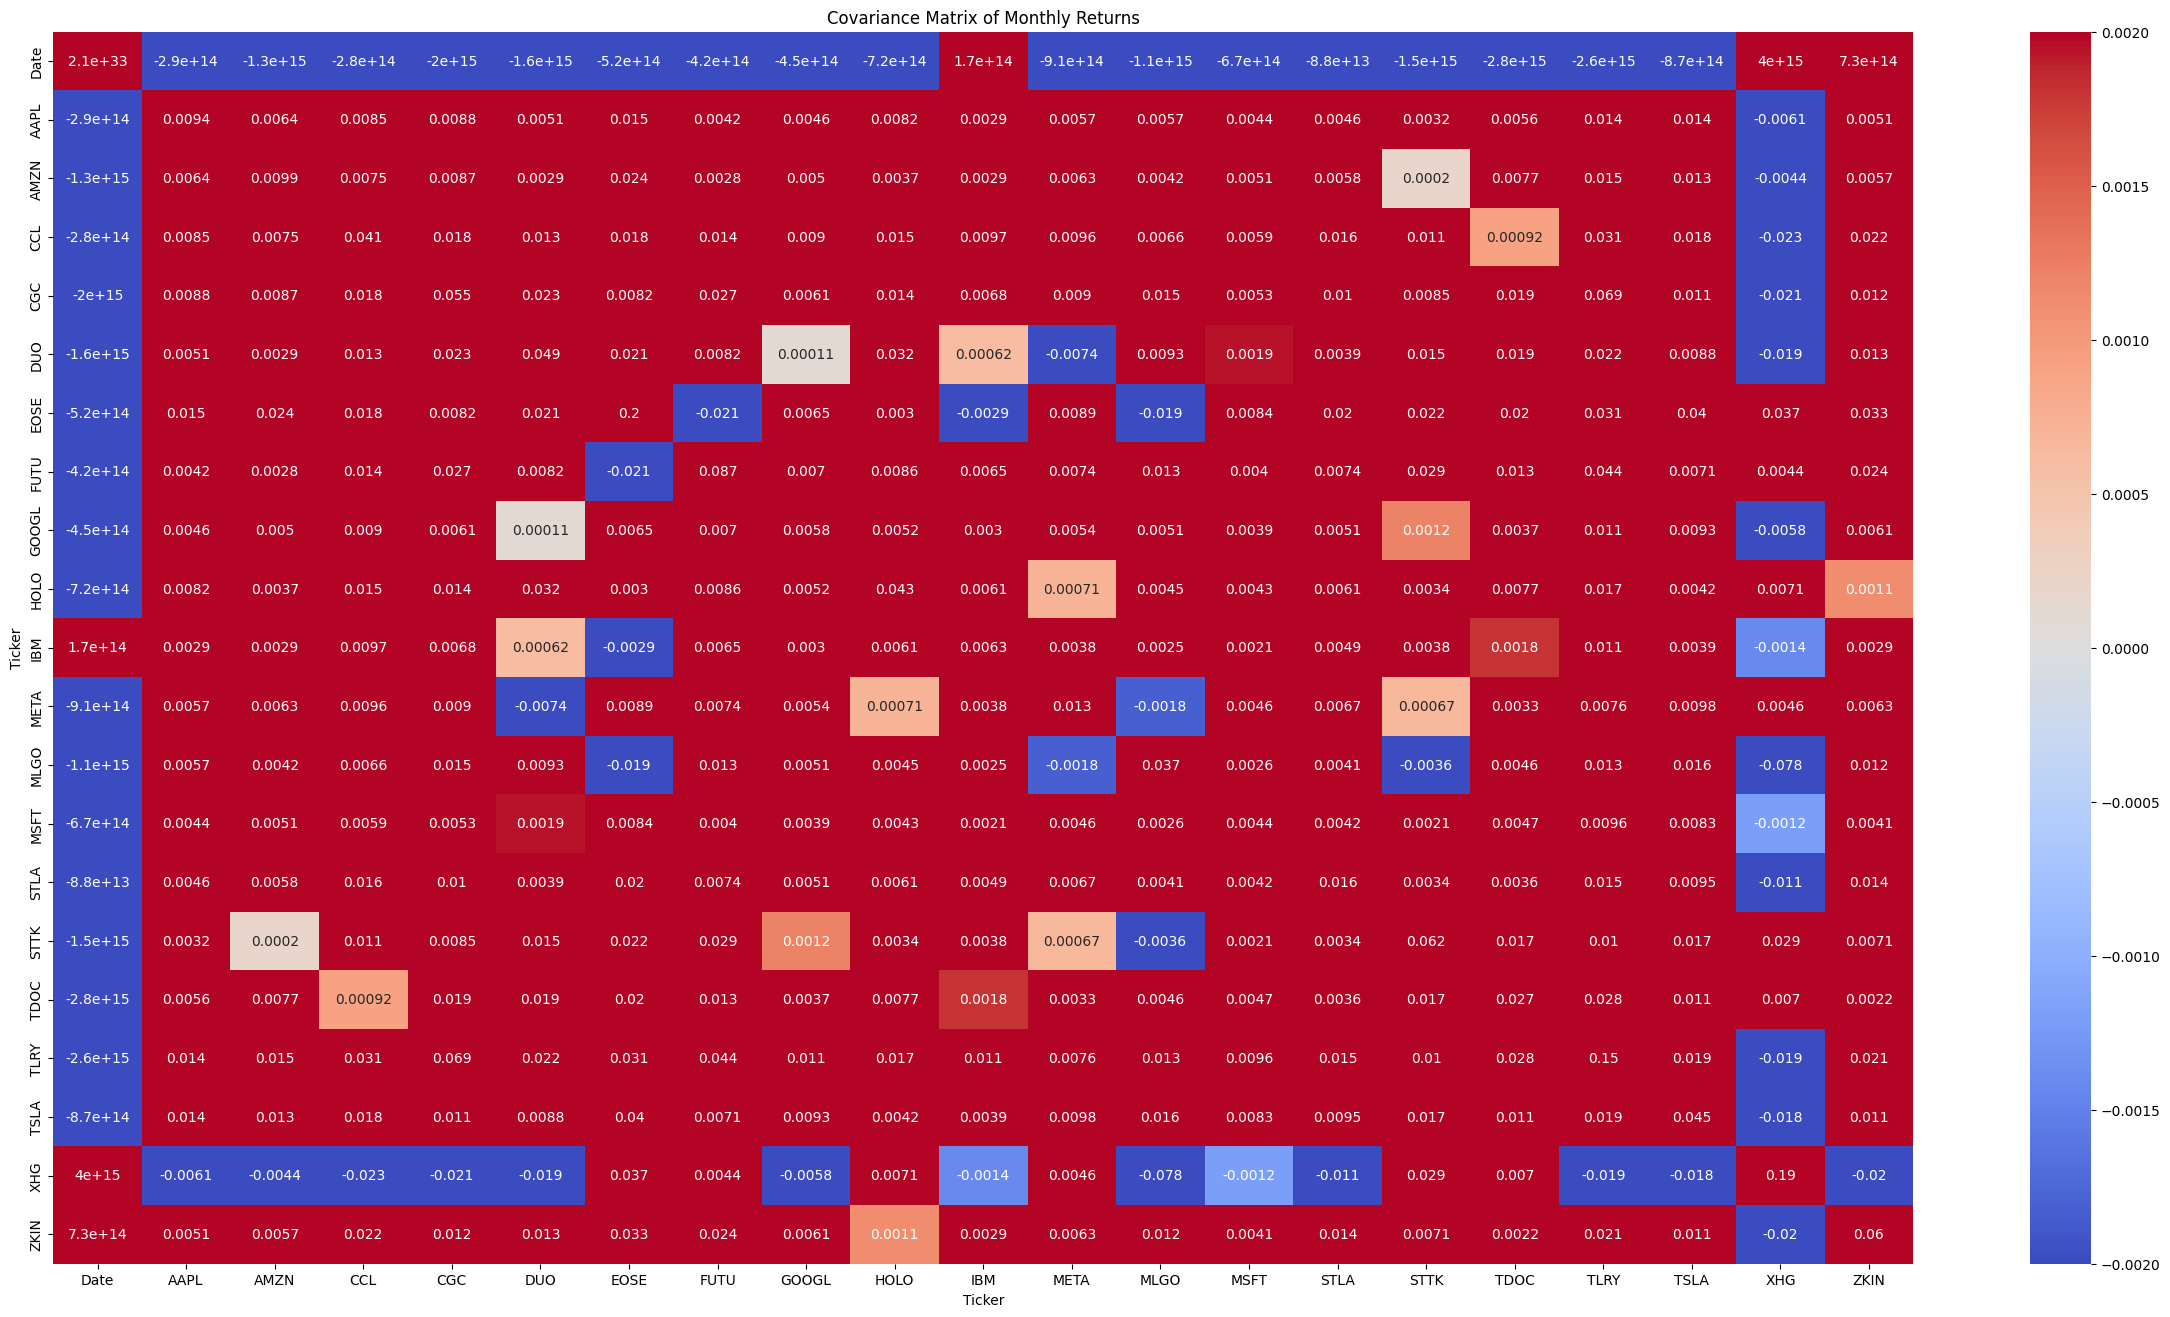

In [ ]:
# Visualize the covariance matrix as a heatmap
plt.figure(figsize=(30, 16))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', vmin=-0.002, vmax=0.002, center=0)
plt.title('Covariance Matrix of Monthly Returns')
plt.show()


## <a name="8"></a> 8 Population Initialization


Define Gene (Scalar): A fraction of the total capital assigned to a stock. Lets address them as weights.

Gene can be a fractional value between 0 to 1, such as 0.32 of Apple or 0.21 of Tesla or 0.56 of IBM



In [ ]:
gene = np.random.rand()
gene

0.11952578658324897

Creating fuctions using Monte Carlo for handling randoness in GA gen_mc_grid: This function generates random layouts of positions (e.g., for wind turbines) in a grid using Monte Carlo simulation. It ensures that exactly N positions are filled in a grid with specified rows and columns.

gen_mc_grid_with_NA_loc: This function adds an additional constraint by marking some positions as unavailable (NA), where NA_loc indicates locations that cannot be used. Similarly, in portfolio optimization, this could represent assets that cannot be allocated, for example, due to restrictions or market conditions. RESTRICIONS refer to practical limits, such as:

Regulatory limits on certain asset classes (e.g., crypto, high-risk assets). Liquidity constraints requiring easily tradable assets. Risk limits on volatility or leverage. Ethical/ESG constraints excluding certain industries. Position size limits to prevent over-concentration in one asset. Market conditions like interest rate changes or currency risk that influence asset selection.

In [ ]:
def gen_mc_grid(rows, cols, n, N):
    """Generate Monte Carlo wind farm layout grids."""
    np.random.seed(seed=int(time.time()))  # Initialize random seed
    layouts = np.zeros((n, rows * cols), dtype=np.int32)  # One row is a layout

    # Generate random positions
    positionX = np.random.randint(0, cols, size=(N * n))
    positionY = np.random.randint(0, rows, size=(N * n))

    ind_rows = 0  # Index of layouts from 0 to n-1
    ind_pos = 0  # Index of positionX, positionY

    while ind_rows < n:
        # Calculate the linear index
        idx = positionX[ind_pos] + positionY[ind_pos] * cols

        # Check if index is within bounds and mark the position
        if idx < layouts.shape[1]:
            layouts[ind_rows, idx] = 1

            # Check if we filled the required number of positions
            if np.sum(layouts[ind_rows, :]) == N:
                ind_rows += 1

        ind_pos += 1

        # Check if we have exhausted all positions
        if ind_pos >= N * n:
            print("Not enough positions")
            break

    return layouts


def gen_mc_grid_with_NA_loc(rows, cols, n, N, NA_loc):
    """Generate Monte Carlo wind farm layout grids considering NA locations."""
    np.random.seed(seed=int(time.time()))  # Initialize random seed
    layouts = np.zeros((n, rows * cols), dtype=np.int32)  # One row is a layout
    layouts_NA = np.zeros((n, rows * cols), dtype=np.int32)  # Layouts with NA locations

    # Mark NA locations
    for i in NA_loc:
        layouts_NA[:, i - 1] = 2  # Set NA locations to 2

    positionX = np.random.randint(0, cols, size=(N * n))
    positionY = np.random.randint(0, rows, size=(N * n))

    ind_rows = 0  # Index of layouts from 0 to n-1
    ind_pos = 0  # Index of positionX, positionY
    N_count = 0  # Count of filled positions

    while ind_rows < n:
        idx = positionX[ind_pos] + positionY[ind_pos] * cols
        cur_state = layouts_NA[ind_rows, idx] if idx < layouts_NA.shape[1] else None

        # Check if the current position is valid
        if cur_state != 1 and cur_state != 2:
            layouts[ind_rows, idx] = 1
            layouts_NA[ind_rows, idx] = 1
            N_count += 1

            # Check if we filled the required number of positions
            if np.sum(layouts[ind_rows, :]) == N:
                ind_rows += 1
                N_count = 0

        ind_pos += 1

        # Check if we have exhausted all positions
        if ind_pos >= N * n:
            print("Not enough positions")
            break

    return layouts, layouts_NA


In [ ]:
gen_mc_grid(5, 5, 100, 50)
gen_mc_grid_with_NA_loc(5, 5, 100, 50,range(10))

Not enough positions
Not enough positions


(array([[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 array([[2, 2, 2, ..., 1, 1, 2],
        [2, 2, 2, ..., 0, 0, 2],
        [2, 2, 2, ..., 0, 0, 2],
        ...,
        [2, 2, 2, ..., 0, 0, 2],
        [2, 2, 2, ..., 0, 0, 2],
        [2, 2, 2, ..., 0, 0, 2]], dtype=int32))

Define Chromosome (1D Array): Set of genes for example fractions of total capital assigned to each stock. Set of weights.

Its a 1d Array of the fractional values of all the stocks such that sum of the array will not be over 1. As we have 20 company stocks, we shall generate 6 fractional values (genes) which constitues 1 chromosome.

Why sum should be equal to 1? As these are fraction of the total capital, we are assuming total capital to be 1 unit.

How to make sure sum =1? Just generate 6 random numbers and then calculate a factor which is 1 / sum of random numbers. Finally multiply each of the random numbers with that factor. The sum will be 1.

In [ ]:
def chromosome(n):
    ''' Generates set of random numbers whose sum is equal to 1
        Input: Number of stocks.
        Output: Array of random numbers'''
    ch = np.random.rand(n)
    return ch/sum(ch)

In [ ]:
# Generating children of 20 stocks :
child=chromosome(20)
print(child,sum(child))

[0.06099684 0.02727514 0.08005392 0.03267097 0.01830551 0.02623884
 0.01425123 0.07140954 0.01340918 0.06812908 0.04190775 0.07869062
 0.07802085 0.01292079 0.08360868 0.08437274 0.05153795 0.0520726
 0.02680269 0.07732508] 0.9999999999999999


In [ ]:
# Generate Initial Population (2D Array): A set of randomly generated chromosomes
n=20 # Number of stocks = 20
pop_size=1000 # initial population = 1000
population = np.array([chromosome(n) for _ in range(pop_size)])
print(population.shape)
print(population)

(1000, 20)
[[0.03129131 0.06609259 0.04744283 ... 0.0237428  0.02717208 0.04396266]
 [0.02895815 0.05335665 0.04174827 ... 0.04518645 0.06989456 0.10724611]
 [0.05487072 0.06258591 0.00817912 ... 0.0089234  0.06890051 0.07929974]
 ...
 [0.06313759 0.07254884 0.03806384 ... 0.08485996 0.06023887 0.02035768]
 [0.07950847 0.04540009 0.08313421 ... 0.06699451 0.00292673 0.0299705 ]
 [0.09895094 0.07282844 0.00077204 ... 0.04304447 0.00281956 0.08751488]]


## <a name="9"></a> 9 Defining Fitness Function


Fitness function (Define a Function): The Sharpe ratio, S, is a measure for quantifying the performance (Fitness) of the portfolio and is computed as follows:

        S = (µ − r)/σ
Here µ is the return of the portfolio over a specified period or Mean portfolio return, r is the risk-free rate over the same period and σ is the standard deviation of the returns over the specified period or Standard deviation of portfolio return.

Mean portfolio return = Mean Return * Fractions of Total Capital (Chromosome).

The current risk-free rate is often represented by the yield on a three-month U.S. Treasury bill (T-bill), which is considered a safe investment with virtually no default risk. As of recent reports, the yield on these T-bills is approximately 5.41% which meant that : 0.541

Standard deviation of portfolio return = (chromosome * Standard deviation)**2 + Covariance * Respective weights in chromosome.

In [ ]:
#Calculate Mean, Standard deviation and covariance of the Historical stock returns:
# Convert to numeric columns from Object datatypes.
print(hist_stock_returns.info())
cols=hist_stock_returns.columns
hist_stock_returns[cols] = hist_stock_returns[cols].apply(pd.to_numeric, errors='coerce')
print(hist_stock_returns.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1_mon_return to 15_mon_return
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5 non-null      float64
 1   AMZN    5 non-null      float64
 2   CCL     5 non-null      float64
 3   CGC     5 non-null      float64
 4   DUO     5 non-null      float64
 5   EOSE    5 non-null      float64
 6   FUTU    5 non-null      float64
 7   GOOGL   5 non-null      float64
 8   HOLO    5 non-null      float64
 9   IBM     5 non-null      float64
 10  META    5 non-null      float64
 11  MLGO    5 non-null      float64
 12  MSFT    5 non-null      float64
 13  STLA    5 non-null      float64
 14  STTK    5 non-null      float64
 15  TDOC    5 non-null      float64
 16  TLRY    5 non-null      float64
 17  TSLA    5 non-null      float64
 18  XHG     5 non-null      float64
 19  ZKIN    5 non-null      float64
dtypes: float64(20)
memory usage: 840.0+ bytes
None
<class 'pandas.

In [ ]:
# Covariance :
cov_hist_return=hist_stock_returns.cov()

print(cov_hist_return)

# For ease of calculations make covariance of same variable as zero.
for i in range(6):
    #cov_hist_return.iloc[i][i]=0
    cov_hist_return.loc[cov_hist_return.index[i], cov_hist_return.columns[i]] = 0


cov_hist_return

Ticker      AAPL      AMZN       CCL       CGC       DUO      EOSE      FUTU  \
Ticker                                                                         
AAPL    0.000415  0.000414  0.000166 -0.000240 -0.000399 -0.000027 -0.001542   
AMZN    0.000414  0.005829  0.010356  0.019024  0.028086  0.031105 -0.000077   
CCL     0.000166  0.010356  0.030327  0.048886  0.071584  0.066122 -0.002443   
CGC    -0.000240  0.019024  0.048886  0.085513  0.124765  0.127347  0.004880   
DUO    -0.000399  0.028086  0.071584  0.124765  0.182427  0.184569  0.005992   
EOSE   -0.000027  0.031105  0.066122  0.127347  0.184569  0.212290  0.019785   
FUTU   -0.001542 -0.000077 -0.002443  0.004880  0.005992  0.019785  0.015374   
GOOGL   0.000314  0.003212  0.006718  0.011900  0.017302  0.019065 -0.000012   
HOLO    0.000047  0.000279  0.000173  0.000255  0.000480  0.000361 -0.000394   
IBM    -0.000071 -0.001108 -0.001722 -0.002973 -0.004561 -0.004434  0.000565   
META    0.000930  0.014971  0.031427  0.

Ticker,AAPL,AMZN,CCL,CGC,DUO,EOSE,FUTU,GOOGL,HOLO,IBM,META,MLGO,MSFT,STLA,STTK,TDOC,TLRY,TSLA,XHG,ZKIN
Ticker,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,0.000414,0.000166,-0.000240,-0.000399,-0.000027,-0.001542,0.000314,0.000047,-0.000071,0.000930,0.000037,0.000378,-0.000072,-0.000380,0.000204,-0.000608,0.000721,0.000130,0.000125
AMZN,0.000414,0.000000,0.010356,0.019024,0.028086,0.031105,-0.000077,0.003212,0.000279,-0.001108,0.014971,0.000164,0.001555,0.001447,0.026761,0.023318,0.014006,0.003215,0.013724,0.012668
CCL,0.000166,0.010356,0.000000,0.048886,0.071584,0.066122,-0.002443,0.006718,0.000173,-0.001722,0.031427,-0.000027,0.003253,0.003985,0.059064,0.051140,0.035908,0.004985,0.004242,0.024648
CGC,-0.000240,0.019024,0.048886,0.000000,0.124765,0.127347,0.004880,0.011900,0.000255,-0.002973,0.054732,-0.000064,0.005312,0.008348,0.110775,0.097287,0.064631,0.007666,0.030929,0.045101
DUO,-0.000399,0.028086,0.071584,0.124765,0.000000,0.184569,0.005992,0.017302,0.000480,-0.004561,0.080544,-0.000011,0.007626,0.011630,0.161411,0.140683,0.094123,0.011587,0.044057,0.066855
EOSE,-0.000027,0.031105,0.066122,0.127347,0.184569,0.000000,0.019785,0.019065,0.000361,-0.004434,0.083818,-0.000075,0.008502,0.015134,0.178167,0.161132,0.098333,0.011471,0.089252,0.070686
FUTU,-0.001542,-0.000077,-0.002443,0.004880,0.005992,0.019785,0.015374,-0.000012,-0.000394,0.000565,-0.001580,-0.000301,-0.000864,0.003067,0.013844,0.014170,0.006922,-0.003451,0.025148,0.001444
GOOGL,0.000314,0.003212,0.006718,0.011900,0.017302,0.019065,-0.000012,0.002002,0.000086,-0.000504,0.008695,0.000032,0.001075,0.001205,0.016045,0.014653,0.008741,0.001716,0.006678,0.006789
HOLO,0.000047,0.000279,0.000173,0.000255,0.000480,0.000361,-0.000394,0.000086,0.000044,-0.000096,0.000590,0.000034,0.000039,-0.000127,0.000455,0.000183,0.000105,0.000267,0.000435,0.000585


In [ ]:
mean_hist_return=hist_stock_returns.mean()
mean_hist_return

,0
Ticker,
AAPL,-0.006704
AMZN,0.082379
CCL,0.170512
CGC,0.420785
DUO,0.550892
EOSE,0.574295
FUTU,0.136441
GOOGL,0.055820
HOLO,-0.002024


In [ ]:
sd_hist_return=hist_stock_returns.std()
sd_hist_return

,0
Ticker,
AAPL,0.020371
AMZN,0.076345
CCL,0.174147
CGC,0.292426
DUO,0.427115
EOSE,0.460750
FUTU,0.123993
GOOGL,0.044738
HOLO,0.006638


Observations:

Mean Returns:

The mean returns range from around -0.002 to 0.550, with most stocks having positive mean returns.
The higher mean returns (around 0.5 and above) are seen for stocks like DUO, EOSE, STTK, and TDOC, indicating that these stocks have had relatively strong performance during the historical period.
The lower mean returns (around -0.002 to 0.018) are seen for stocks like HOLO, IBM, and MSFT, suggesting more moderate performance.
The range of mean returns seems appropriate for the historical data you're working with.


Standard Deviations:

The standard deviations range from around 0.006 to 0.460, with most stocks having standard deviations in the 0.020 to 0.350 range.
The higher standard deviations (around 0.350 and above) are seen for stocks like DUO, EOSE, STTK, TDOC, and TLRY, indicating relatively higher volatility for these stocks.
The lower standard deviations (around 0.006 to 0.050) are seen for stocks like HOLO, IBM, and MSFT, suggesting these stocks have been more stable.
The range of standard deviations also seems reasonable for the historical data.

#Expected returns calculation

In [ ]:
def mean_portfolio_return(child):
    return np.sum(np.multiply(child,mean_hist_return))

In [ ]:
#Calculate porpolio variance
def var_portfolio_return(child):
    part_1 = np.sum(np.multiply(child,sd_hist_return)**2)
    temp_lst=[]
    for i in range(6):
        for j in range(6):
            #temp=cov_hist_return.iloc[i][j] * child[i] * child[j]
            temp = cov_hist_return.iloc[i, j] * child[i] * child[j]
            temp_lst.append(temp)
    part_2=np.sum(temp_lst)
    return part_1+part_2

In [ ]:
var_portfolio_return(population[0])

0.005604422946722016

The risk-free rate is typically represented by the yield on a government bond, as government bonds are generally considered to be the safest investment with the lowest risk of default. The most common reference for the risk-free rate is the yield on the 10-year U.S. Treasury bond.
As of the current date, the 10-year U.S. Treasury yield is around 3.5-4.0%. This would translate to a risk-free factor in the range of 0.035-0.040 (3.5-4.0%) on an annual basis.

In [ ]:
annual_risk_free_rate = 0.04
rf = (1 + annual_risk_free_rate)**(1/12) - 1
print(f"Monthly risk-free rate: {rf:.4f}")

Monthly risk-free rate: 0.0033


In [ ]:
def fitness_fuction(child):
    ''' This will return the Sharpe ratio for a particular portfolio.
        Input: A child/chromosome (1D Array)
        Output: Sharpe Ratio value (Scalar)'''
    return (mean_portfolio_return(child)-rf)/np.sqrt(var_portfolio_return(child))
fitness_fuction(population[167])

2.441973459245555

In [ ]:
def count_sharpe_ratios(population):
    """
    Count the number of portfolios with positive and negative Sharpe ratios.

    Input: population - a list or array of chromosomes (portfolios)
    Output: A tuple containing (positive_count, negative_count, zero_count)
    """
    positive_count = 0
    negative_count = 0
    zero_count = 0

    for chromosome in population:
        sharpe_ratio = fitness_fuction(chromosome)
        if sharpe_ratio > 0:
            positive_count += 1
        elif sharpe_ratio < 0:
            negative_count += 1
        else:
            zero_count += 1

    return positive_count, negative_count, zero_count
# Count Sharpe ratios
positive, negative, zero = count_sharpe_ratios(population)

print(f"Portfolios with positive Sharpe ratio: {positive}")
print(f"Portfolios with negative Sharpe ratio: {negative}")
print(f"Portfolios with zero Sharpe ratio: {zero}")

# Calculate percentages
total = len(population)
print(f"Percentage of portfolios with positive Sharpe ratio: {positive/total*100:.2f}%")
print(f"Percentage of portfolios with negative Sharpe ratio: {negative/total*100:.2f}%")
print(f"Percentage of portfolios with zero Sharpe ratio: {zero/total*100:.2f}%")

# Check the Sharpe ratio of a specific portfolio (e.g., the 168th one)
specific_sharpe = fitness_fuction(population[167])
print(f"Sharpe ratio of the 168th portfolio: {specific_sharpe}")

Portfolios with positive Sharpe ratio: 1000
Portfolios with negative Sharpe ratio: 0
Portfolios with zero Sharpe ratio: 0
Percentage of portfolios with positive Sharpe ratio: 100.00%
Percentage of portfolios with negative Sharpe ratio: 0.00%
Percentage of portfolios with zero Sharpe ratio: 0.00%
Sharpe ratio of the 168th portfolio: 2.441973459245555


## <a name="13"></a> 13 Version 3: Evolutionary Programming (ES)


It uses elitism (selecting the best individuals for the next generation). It incorporates advanced recombination methods (Heuristic and Arithmetic crossover), which are not typically part of ES but are borrowed from EP.(done) To be implemented further we implement self-adaptive mutation rates.

In [ ]:
def Select_elite_population(population, frac=0.4):
    ''' Select elite population from the total population based on fitness function values.
        Input: Population and fraction of population to be considered as elite.
        Output: Elite population.'''
    population = sorted(population,key = lambda x: fitness_fuction(x),reverse=True)
    percentage_elite_idx = int(np.floor(len(population)* frac))
    return population[:percentage_elite_idx]

In [ ]:
print(len(Select_elite_population(population, frac=0.4)))
Select_elite_population(population, frac=0.4)# out of 1000 generations, keeps 400 of them .

400


[array([0.01295223, 0.05361055, 0.00689964, 0.03512093, 0.02547425,
        0.00421209, 0.05901887, 0.01616319, 0.09327166, 0.05922316,
        0.06791891, 0.08671417, 0.08264216, 0.06905711, 0.05597671,
        0.03846431, 0.08715814, 0.01841304, 0.05120063, 0.07650824]),
 array([6.33887362e-03, 2.40392143e-02, 2.53836417e-02, 7.72283308e-02,
        3.89556176e-05, 1.92087234e-02, 2.64624149e-02, 8.69929110e-02,
        6.48260224e-02, 7.52617459e-02, 8.14508088e-02, 2.35295460e-02,
        7.18295297e-02, 3.89806320e-02, 6.44761331e-02, 6.23224530e-02,
        7.47920984e-02, 3.73767473e-02, 7.04394174e-02, 6.90218004e-02]),
 array([0.02602087, 0.0907935 , 0.00780389, 0.06994514, 0.00583475,
        0.00429788, 0.01994125, 0.05926456, 0.03444933, 0.04664606,
        0.0371506 , 0.08848056, 0.087047  , 0.02515321, 0.05720655,
        0.08466362, 0.09097233, 0.00707717, 0.0720341 , 0.08521763]),
 array([0.00285736, 0.05265301, 0.00686822, 0.08687304, 0.0148516 ,
        0.00210282, 0.

In [ ]:
[fitness_fuction(x) for x in population][:3]# the highest sharpe ratio


[2.8620827976196876, 2.385690072463879, 2.363065352554638]

Mutation: A function that will perform mutation in a chromosome.

Randomly choose 2 numbers between [0, 19] and those elements should be swapped.We have 20 stocks!

In [ ]:
def mutation(chromosome):
    ''' Perform mutation on the chromosome by swapping two randomly chosen elements.
        Input: A chromosome (1D Array)
        Output: Mutated chromosome (1D Array)'''
    # Choose two random indices between 0 and 19
    idx1, idx2 = np.random.randint(0, 20, 2)

    # Swap the elements at those indices
    chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]

    return chromosome

Crossover: Heuristic crossover or Blend Crossover uses the ﬁtness values of two parent chromosomes to ascertain the direction of the search. It moves from worst parent to best parent.

The oﬀspring are created according to the equation:

    Off_spring A = Best Parent  + β ∗ ( Best Parent − Worst Parent)
    Off_spring B = Worst Parent - β ∗ ( Best Parent − Worst Parent)
        Where β is a random number between 0 and 1.
This crossover type is good for real-valued genomes.

In [ ]:
def Heuristic_crossover(parent1,parent2):
    ''' The oﬀsprings are created according to the equation:
            Off_spring A = Best Parent  + β ∗ ( Best Parent − Worst Parent)
            Off_spring B = Worst Parent - β ∗ ( Best Parent − Worst Parent)
                Where β is a random number between 0 and 1.
        Input: 2 Parents
        Output: 2 Children (1d Array)'''
    ff1=fitness_fuction(parent1)
    ff2=fitness_fuction(parent2)
    diff=parent1 - parent2
    beta=np.random.rand()
    if ff1>ff2:
        child1=parent1 + beta * diff
        child2=parent2 - beta * diff
    else:
        child2=parent1 + beta * diff
        child1=parent2 - beta * diff
    return child1,child2

In [ ]:
for i in population[:4]:
    for j in population[:4]:
        print(Heuristic_crossover(i,j))

(array([0.03129131, 0.06609259, 0.04744283, 0.02769926, 0.07668195,
       0.00803148, 0.05463587, 0.05972333, 0.03553787, 0.06514638,
       0.06934012, 0.0336244 , 0.02890299, 0.09177499, 0.08993503,
       0.07349266, 0.04576941, 0.0237428 , 0.02717208, 0.04396266]), array([0.03129131, 0.06609259, 0.04744283, 0.02769926, 0.07668195,
       0.00803148, 0.05463587, 0.05972333, 0.03553787, 0.06514638,
       0.06934012, 0.0336244 , 0.02890299, 0.09177499, 0.08993503,
       0.07349266, 0.04576941, 0.0237428 , 0.02717208, 0.04396266]))
(array([ 0.03272093,  0.07389637,  0.05093209,  0.00810579,  0.07060265,
       -0.00401237,  0.07334434,  0.0415697 ,  0.05225789,  0.09273048,
        0.09784536,  0.03275026,  0.01446881,  0.11771751,  0.09975896,
        0.06338571,  0.0651411 ,  0.01060347,  0.00099441,  0.00518651]), array([ 0.02752853,  0.04555286,  0.03825901,  0.07926966,  0.0926828 ,
        0.03973114,  0.0053948 ,  0.10750405, -0.00846958, -0.00745555,
       -0.00568625,  0.0

In [ ]:
def Arithmetic_crossover(parent1,parent2):
    ''' The oﬀsprings are created according to the equation:
            Off spring A = α ∗ Parent1 + (1 −α) ∗ Parent2
            Off spring B = (1 −α) ∗ Parent1 + α ∗ Parent2

                Where α is a random number between 0 and 1.
        Input: 2 Parents
        Output: 2 Children (1d Array)'''
    alpha = np.random.rand()
    child1 = alpha * parent1 + (1-alpha) * parent2
    child2 = (1-alpha) * parent1 + alpha * parent2
    return child1,child2

In [ ]:
for i in population[:2]:
    for j in population[:2]:
        print(Arithmetic_crossover(i,j))

(array([0.03129131, 0.06609259, 0.04744283, 0.02769926, 0.07668195,
       0.00803148, 0.05463587, 0.05972333, 0.03553787, 0.06514638,
       0.06934012, 0.0336244 , 0.02890299, 0.09177499, 0.08993503,
       0.07349266, 0.04576941, 0.0237428 , 0.02717208, 0.04396266]), array([0.03129131, 0.06609259, 0.04744283, 0.02769926, 0.07668195,
       0.00803148, 0.05463587, 0.05972333, 0.03553787, 0.06514638,
       0.06934012, 0.0336244 , 0.02890299, 0.09177499, 0.08993503,
       0.07349266, 0.04576941, 0.0237428 , 0.02717208, 0.04396266]))
(array([0.02923724, 0.05488012, 0.04242946, 0.05585111, 0.08541668,
       0.02533606, 0.02775558, 0.08580643, 0.01151456, 0.02551359,
       0.02838385, 0.03488035, 0.04964199, 0.05450083, 0.07582004,
       0.0880143 , 0.01793619, 0.04262136, 0.0647841 , 0.09967615]), array([0.03101222, 0.06456911, 0.04676165, 0.03152434, 0.07786877,
       0.0103827 , 0.05098357, 0.06326732, 0.03227375, 0.05976135,
       0.06377527, 0.03379505, 0.03172086, 0.08671044,

In [ ]:
Arithmetic_crossover(population[2],population[3])

(array([0.10029414, 0.03445096, 0.03833442, 0.03664778, 0.02875133,
        0.00780506, 0.01735286, 0.07150254, 0.00020176, 0.02425532,
        0.04862905, 0.06893954, 0.08540195, 0.07273124, 0.09463651,
        0.01249296, 0.10362218, 0.05836128, 0.04951039, 0.04607872]),
 array([0.05866239, 0.06023737, 0.01069631, 0.06232704, 0.06900015,
        0.07975846, 0.04619789, 0.05722485, 0.00185248, 0.04786373,
        0.06132136, 0.06626547, 0.03408511, 0.04733034, 0.03093984,
        0.04732906, 0.06204939, 0.01305018, 0.06728193, 0.07652664]))

Next Generation: A function which does mutation,mating or crossover based on a probability and builds a new generation of chromosomes.



In [ ]:
def next_generation(pop_size, elite, crossover=Heuristic_crossover):
    '''Generates new population from elite population with mutation probability as 0.4 and crossover as 0.6.
       Over the final stages, mutation probability is decreased to 0.1.
       Input: Population Size and elite population.
       Output: Next generation population (2D Array).'''
    new_population = []
    elite_range = range(len(elite))

    while len(new_population) < pop_size:
        # Determine mutation or crossover based on generation stage
        if len(new_population) > 2 * pop_size / 3:  # In the final stages mutation frequency is decreased.
            mutate_or_crossover = np.random.choice([0, 1], p=[0.9, 0.1])
        else:
            mutate_or_crossover = np.random.choice([0, 1], p=[0.4, 0.6])

        if mutate_or_crossover:  # Mutation
            indx = np.random.choice(elite_range)
            new_population.append(mutation(elite[indx]))
        else:  # Crossover
            p1_idx, p2_idx = np.random.choice(elite_range, 2)
            c1, c2 = crossover(elite[p1_idx], elite[p2_idx])

            # Ensure no negative genes in the offspring
            while np.any(c1 < 0) or np.any(c2 < 0):
                p1_idx, p2_idx = np.random.choice(elite_range, 2)
                c1, c2 = crossover(elite[p1_idx], elite[p2_idx])

            new_population.extend([c1, c2])

    return new_population


In [ ]:
elite=Select_elite_population(population)
next_generation(1000,elite)[:3]

[array([0.01829044, 0.0718671 , 0.06331492, 0.05866985, 0.04764489,
        0.04546566, 0.04396239, 0.05934319, 0.08165765, 0.04300642,
        0.06824371, 0.03377775, 0.04888507, 0.03591601, 0.06766976,
        0.05173432, 0.07030127, 0.01114197, 0.02936257, 0.04974508]),
 array([1.65789394e-02, 1.89227165e-02, 1.97741424e-05, 3.90997515e-02,
        6.78534771e-02, 7.38974920e-02, 8.45458198e-02, 9.71297998e-02,
        5.29441833e-02, 4.16387461e-02, 5.42888225e-02, 1.42005980e-02,
        7.90489032e-02, 2.88421211e-02, 3.62300228e-02, 3.83192095e-02,
        6.33843575e-02, 6.98715614e-02, 3.80635087e-02, 8.51201955e-02]),
 array([0.0476301 , 0.0753246 , 0.02693809, 0.04586448, 0.03089061,
        0.05558906, 0.04039317, 0.04829466, 0.03562778, 0.0664172 ,
        0.06394833, 0.03241409, 0.07584029, 0.06909171, 0.08439014,
        0.06220464, 0.00257279, 0.00640822, 0.05359111, 0.07656891])]

ES using Heuristic Crossover

In [ ]:
# This time is with With Heuristic_crossover
n=20 # Number of stocks = 20
pop_size=1000 # initial population = 1000

# Initial population
population = np.array([chromosome(n) for _ in range(pop_size)])

# Get initial elite population
elite = Select_elite_population(population)

iteration=0
Expected_returns=0
Expected_risk=1
# Should try some value here based on the dynamic of data :
#while (Expected_returns < 0.30 and Expected_risk > 0.0005) or iteration <= 40:
while (Expected_returns < 0.20 and Expected_risk > 0.001) or iteration <= 40:

    print('Iteration:',iteration)
    population = next_generation(1000,elite)
    elite = Select_elite_population(population)
    Expected_returns=mean_portfolio_return(elite[0])
    Expected_risk=var_portfolio_return(elite[0])
    print('Expected returns of {} with risk of {}\n'.format(Expected_returns,Expected_risk))
    iteration+=1


print('Portfolio of stocks after all the iterations:\n')
[print(hist_stock_returns.columns[i],':',elite[0][i]) for i in list(range(20))]

Iteration: 0
Expected returns of 0.16729321887292367 with risk of 0.0023776891763605747

Iteration: 1
Expected returns of 0.1589934247947456 with risk of 0.0021194031084742636

Iteration: 2
Expected returns of 0.17469242327998555 with risk of 0.0024998440817369477

Iteration: 3
Expected returns of 0.19121977724104328 with risk of 0.0029960296019666136

Iteration: 4
Expected returns of 0.18169238207060848 with risk of 0.0025924287472416548

Iteration: 5
Expected returns of 0.18604929036464335 with risk of 0.0028067822426088265

Iteration: 6
Expected returns of 0.15631336373801458 with risk of 0.001958424350877289

Iteration: 7
Expected returns of 0.18696176499423264 with risk of 0.0028137690952742536

Iteration: 8
Expected returns of 0.15261093058400785 with risk of 0.001746355449902934

Iteration: 9
Expected returns of 0.15542677414339706 with risk of 0.001815409629809968

Iteration: 10
Expected returns of 0.15238608634005132 with risk of 0.0017362485638654328

Iteration: 11
Expected r

KeyboardInterrupt: 

ES using Heuristic Crossover with risk constraint

In [ ]:
n=20
pop_size=1000

# Initial population
population = np.array([chromosome(n) for _ in range(pop_size)])

# Get initial elite population
elite = Select_elite_population(population)

iteration=0
expected_returns=0
expected_risk=1

# Set the maximum number of iterations to 40
max_iterations = 40

while iteration < max_iterations:
    print('Iteration:', iteration)
    population = next_generation(1000, elite)
    elite = Select_elite_population(population)
    expected_returns = mean_portfolio_return(elite[0])
    expected_risk = var_portfolio_return(elite[0])

    # Check if the risk constraint is met
    if expected_risk <= 0.0225:
        print('Expected returns of {} with risk of {}\n'.format(expected_returns, expected_risk))
    else:
        print(f'Risk constraint not met. Expected risk of {expected_risk:.4f} exceeds the limit of 0.0225.')

    iteration += 1

# Print the final portfolio
print('Portfolio of stocks after all the iterations:\n')
[print(hist_stock_returns.columns[i], ':', elite[0][i]) for i in list(range(20))]

Iteration: 0
Expected returns of 0.19433386143194786 with risk of 0.003302075427439369

Iteration: 1
Expected returns of 0.1928641477210163 with risk of 0.0032339441602729137

Iteration: 2
Expected returns of 0.19468747130871428 with risk of 0.0032355711046166396

Iteration: 3
Expected returns of 0.19464628278418278 with risk of 0.0032346489731122437

Iteration: 4
Expected returns of 0.2048269713648315 with risk of 0.0035452376745435344

Iteration: 5
Expected returns of 0.18453936628731887 with risk of 0.002636110712442094

Iteration: 6
Expected returns of 0.1817288891864477 with risk of 0.0025804400312565146

Iteration: 7
Expected returns of 0.14727069503330883 with risk of 0.001695441474439063

Iteration: 8
Expected returns of 0.15539123619202821 with risk of 0.0018504560148221853

Iteration: 9
Expected returns of 0.15699959037931385 with risk of 0.001852349122918157

Iteration: 10
Expected returns of 0.1438695724511503 with risk of 0.0015487245849376825

Iteration: 11
Expected retur

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
print('Portfolio of stocks after all the iterations:\n')
[print(hist_stock_returns.columns[i],':',elite[0][i]) for i in list(range(20))]

print('\nExpected returns of {} with risk of {}\n'.format(Expected_returns,Expected_risk))

Portfolio of stocks after all the iterations:

AAPL : 0.01707917233289924
AMZN : 0.02597854019207604
CCL : 0.01066278468800908
CGC : 0.0038601522046496166
DUO : 0.01941371109247492
EOSE : 0.012652171562663834
FUTU : 0.11002483351957314
GOOGL : 0.10455353009241734
HOLO : 0.004151356792053324
IBM : 0.002525441515601073
META : 0.06862106936474999
MLGO : 0.021734059519410133
MSFT : 0.10478785319057174
STLA : 0.15311343769289076
STTK : 0.041926209298454024
TDOC : 0.046862934409426515
TLRY : 0.09237866032913587
TSLA : 0.024146182585007725
XHG : 0.04288676761975628
ZKIN : 0.09264113199817958

Expected returns of 0.14337846108142388 with risk of 0.0013373880718811934



ES Approach using Arithmetic Crossover

In [ ]:
elite=Select_elite_population(population)
next_generation(1000,elite,Arithmetic_crossover)[:3]

[array([0.04232249, 0.05388422, 0.05598766, 0.01424105, 0.00316154,
        0.02366471, 0.10355439, 0.06400673, 0.02439064, 0.0154037 ,
        0.07036966, 0.00298655, 0.07788092, 0.04602444, 0.05783684,
        0.08182168, 0.0996479 , 0.01844826, 0.0575858 , 0.08678083]),
 array([0.04683936, 0.04530394, 0.06170076, 0.01271739, 0.00305076,
        0.02341774, 0.10366552, 0.06010106, 0.02232998, 0.01638925,
        0.06902111, 0.00305821, 0.08103223, 0.05539335, 0.05313784,
        0.08023966, 0.09773672, 0.02183045, 0.05483403, 0.08820066]),
 array([0.07232964, 0.01676928, 0.04937392, 0.00844755, 0.00087017,
        0.02053112, 0.09331414, 0.07232152, 0.01230257, 0.02969271,
        0.07101331, 0.00212606, 0.09352153, 0.07791476, 0.05660858,
        0.0574779 , 0.10659802, 0.02028147, 0.04124388, 0.09726186])]

In [ ]:
# Main execution
n = 20  # Number of stocks
pop_size = 1000  # Initial population

# Initial population
population = np.array([chromosome(n) for _ in range(pop_size)])

# Get initial elite population
elite = Select_elite_population(population)

# Initialize variables
iteration = 0
Expected_returns = -1  # Set to a value less than 0.20 to enter the loop initially
Expected_risk = float('inf')  # Set to a high value to enter the loop initially

# Loop until maximum iterations reached (fixed at 40)
while iteration < 40:
    print('Iteration:', iteration)

    # Generate next population and select elite population
    population = next_generation(pop_size, elite)
    elite = Select_elite_population(population)

    # Calculate expected returns and risk
    Expected_returns = mean_portfolio_return(elite[0])
    Expected_risk = var_portfolio_return(elite[0])

    # Print the results
    print('Expected returns of {:.4f} with risk of {:.4f}\n'.format(Expected_returns, Expected_risk))

    iteration += 1

# Final portfolio output
print('Portfolio of stocks after all the iterations:\n')
for i in range(n):  # Using n for the number of stocks
    print(hist_stock_returns.columns[i], ':', elite[0][i])


Iteration: 0
Expected returns of 0.2277 with risk of 0.0045

Iteration: 1
Expected returns of 0.1776 with risk of 0.0028

Iteration: 2
Expected returns of 0.1757 with risk of 0.0025

Iteration: 3
Expected returns of 0.1922 with risk of 0.0030

Iteration: 4
Expected returns of 0.1607 with risk of 0.0020

Iteration: 5
Expected returns of 0.1936 with risk of 0.0029

Iteration: 6
Expected returns of 0.1840 with risk of 0.0026

Iteration: 7
Expected returns of 0.1762 with risk of 0.0024

Iteration: 8
Expected returns of 0.1811 with risk of 0.0025

Iteration: 9
Expected returns of 0.1712 with risk of 0.0022

Iteration: 10
Expected returns of 0.1777 with risk of 0.0024

Iteration: 11
Expected returns of 0.1776 with risk of 0.0023

Iteration: 12
Expected returns of 0.2128 with risk of 0.0034

Iteration: 13
Expected returns of 0.1915 with risk of 0.0027

Iteration: 14
Expected returns of 0.1912 with risk of 0.0027

Iteration: 15
Expected returns of 0.1914 with risk of 0.0027

Iteration: 16
Expe

## <a name="14"></a> 14 Version 4: Advanced ES


1.Self-Adaptation: The method adapts both the solution (individual) and its own parameters (mutation rates) simultaneously. This is a key feature of advanced ES algorithms.

2.Individual-specific Mutation Rates: Each individual has its own mutation rate, allowing for more fine-grained control over the evolution process.

3.Sophisticated Learning Rates: The snippet uses two different learning rates (tau and tau_prime).
These formulas are derived from theoretical and empirical studies in ES to provide good performance across a wide range of problems.

4.Log-normal Distribution: The mutation rates are updated using a log-normal distribution, which ensures they remain positive.

5.Correlated Mutations: By using np.random.randn(len(individual)), it allows for potentially correlated mutations across the individual's components, which can be beneficial in certain problem landscapes.

6.Constraint Handling: The method ensures that the weights remain non-negative and sum to 1, which is crucial for portfolio optimization problems.


Comparision of Advanced ES and Advanced EP

| Aspect | Old (EP) | New (ES) |
|--------|----------|----------|
| Selection Mechanism | Tournament selection | (μ + λ) selection |
| Parent Selection | Entire population as potential parents | Top μ individuals as parents |
| Offspring Generation | Only mutation | Combination of crossover and mutation |
| Crossover | Not implemented | Arithmetic crossover |
| Elitism | Explicit preservation of elite individuals | Implicit through (μ + λ) selection |
| Population Structure | Single population | Separate parent and offspring populations |
| Mutation | Applied to all individuals | Applied probabilistically |
| Algorithm Parameters | `generations`, `elite_fraction` | `generations`, `mu`, `lambda_`, `crossover_prob` |
| Adaptation | Self-adaptive mutation rates | Self-adaptive mutation rates with influence from crossover |
| Selection Pressure | Controlled by tournament size | Controlled by μ/λ ratio |
| Diversity Maintenance | Implicit through tournament selection | Through balance of μ and λ |
| Computational Complexity | O(population_size) per generation | O(μ + λ) per generation |
| Typical Use Case | Good for problems where recombination is less important | Effective for problems where recombination is beneficial |
| Convergence Speed | Can be slower due to more exploration | Potentially faster due to more exploitation |
| Parameter Tuning | Fewer parameters to tune | More parameters, allowing finer control |

In [ ]:
def self_adaptive_mutation(chromosome, mutation_rate):
    '''Perform improved self-adaptive mutation on the chromosome.'''

    # Update mutation rate
    tau = 1 / np.sqrt(2 * np.sqrt(len(chromosome)))
    tau_prime = 1 / np.sqrt(2 * len(chromosome))
    mutation_rate *= np.exp(tau_prime * np.random.randn() + tau * np.random.randn())

    # Ensure mutation rate stays within reasonable bounds
    mutation_rate = np.clip(mutation_rate, 0.001, 0.5)

    # Perform mutation
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            j = np.random.randint(0, len(chromosome))
            chromosome[i], chromosome[j] = chromosome[j], chromosome[i]

    # Small random adjustment to all weights
    chromosome += np.random.normal(0, 0.01, len(chromosome))

    # Ensure non-negative weights and normalization
    chromosome = np.maximum(chromosome, 0)
    chromosome /= np.sum(chromosome)

    return chromosome, mutation_rate

In [ ]:
n = 20  # number of stocks
initial_chromosome = np.random.rand(n)
initial_chromosome /= np.sum(initial_chromosome)  # Normalize to sum to 1
initial_mutation_rate = 0.1

print("Initial chromosome:", initial_chromosome)
print("Initial mutation rate:", initial_mutation_rate)
print("\nApplying self-adaptive mutation 10 times:\n")

chromosome = initial_chromosome.copy()
mutation_rate = initial_mutation_rate

for i in range(10):
    chromosome, mutation_rate = self_adaptive_mutation(chromosome, mutation_rate)
    print(f"Iteration {i+1}:")
    print("Chromosome:", chromosome)
    print("Mutation rate:", mutation_rate)
    print("Sum of chromosome:", np.sum(chromosome))  # Should always be very close to 1
    print()

print("Final chromosome:", chromosome)
print("Final mutation rate:", mutation_rate)
print("Number of changes from initial chromosome:", np.sum(chromosome != initial_chromosome))

Initial chromosome: [0.04658284 0.07033587 0.07518289 0.0732013  0.02533549 0.07710354
 0.02006036 0.05720419 0.06717513 0.06735858 0.05789227 0.06034672
 0.00718582 0.03445447 0.06597386 0.01298581 0.04147228 0.0077404
 0.0717239  0.06068426]
Initial mutation rate: 0.1

Applying self-adaptive mutation 10 times:

Iteration 1:
Chromosome: [0.03933409 0.07084612 0.06906877 0.0706149  0.05144882 0.08216483
 0.00957446 0.01384509 0.08044137 0.07087467 0.0763514  0.04736914
 0.05345844 0.04302576 0.02388334 0.01619948 0.03927794 0.01126465
 0.06590055 0.06505619]
Mutation rate: 0.08148736349618375
Sum of chromosome: 1.0

Iteration 2:
Chromosome: [0.05305129 0.07454283 0.07936379 0.08575584 0.04087023 0.08409834
 0.01354254 0.02424851 0.07736193 0.05619806 0.06168868 0.05534352
 0.05989755 0.04296329 0.03810419 0.00569495 0.01782173 0.00052369
 0.06049257 0.0684365 ]
Mutation rate: 0.07220717412821698
Sum of chromosome: 1.0000000000000002

Iteration 3:
Chromosome: [0.04910276 0.07489074 0.08

In [ ]:
def next_generation(pop_size, elite, mutation_rates, crossover=Heuristic_crossover):
    '''Generates new population from elite population with self-adaptive mutation.
    Input: Population Size, elite population, mutation rates, and crossover function.
    Output: Next generation population (2D Array) and updated mutation rates.'''

    new_population = []
    new_mutation_rates = []
    elite_range = range(len(elite))

    while len(new_population) < pop_size:
        # Determine mutation or crossover based on generation stage
        if len(new_population) > 2 * pop_size / 3:  # In the final stages mutation frequency is decreased.
            mutate_or_crossover = np.random.choice([0, 1], p=[0.9, 0.1])
        else:
            mutate_or_crossover = np.random.choice([0, 1], p=[0.4, 0.6])

        if mutate_or_crossover:  # Mutation
            indx = np.random.choice(elite_range)
            mutated_chromosome, new_rate = self_adaptive_mutation(elite[indx].copy(), mutation_rates[indx])
            new_population.append(mutated_chromosome)
            new_mutation_rates.append(new_rate)
        else:  # Crossover
            p1_idx, p2_idx = np.random.choice(elite_range, 2)
            c1, c2 = crossover(elite[p1_idx], elite[p2_idx])

            # Ensure no negative genes in the offspring
            while np.any(c1 < 0) or np.any(c2 < 0):
                p1_idx, p2_idx = np.random.choice(elite_range, 2)
                c1, c2 = crossover(elite[p1_idx], elite[p2_idx])

            new_population.extend([c1, c2])
            new_mutation_rates.extend([mutation_rates[p1_idx], mutation_rates[p2_idx]])

    return np.array(new_population[:pop_size]), np.array(new_mutation_rates[:pop_size])



In [ ]:
# Main execution
n = 20
pop_size = 1000

# Create the initial population
initial_population = [chromosome(n) for _ in range(pop_size)]
population = np.array(initial_population)

# Initial mutation rates
mutation_rates = np.ones(pop_size) * 0.1  # Starting with 0.1 for all individuals

# Get initial elite population
elite = Select_elite_population(population)

iteration = 0
expected_returns = 0
expected_risk = 1

# Set the maximum number of iterations to 40
max_iterations = 40

while iteration < max_iterations:
    print('Iteration:', iteration)

    # Apply self-adaptive mutation to the population
    for i in range(pop_size):
        population[i], mutation_rates[i] = self_adaptive_mutation(population[i], mutation_rates[i])

    elite = Select_elite_population(population)
    expected_returns = mean_portfolio_return(elite[0])
    expected_risk = var_portfolio_return(elite[0])

    # Check if the risk constraint is met
    if expected_risk <= 0.0225:
        print('Expected returns of {} with risk of {}\n'.format(expected_returns, expected_risk))
    else:
        print(f'Risk constraint not met. Expected risk of {expected_risk:.4f} exceeds the limit of 0.0225.')

    iteration += 1

print('Portfolio of stocks after all the iterations:\n')
[print(hist_stock_returns.columns[i], ':', elite[0][i]) for i in range(20)]

print('\nFinal Expected returns:', expected_returns)
print('Final Expected risk:', expected_risk)
print('Final Sharpe Ratio:', fitness_fuction(elite[0]))

Iteration: 0
Expected returns of 0.2053262911256756 with risk of 0.006007523112142614

Iteration: 1
Expected returns of 0.1990091277433329 with risk of 0.004456716010857963

Iteration: 2
Expected returns of 0.1899281715914041 with risk of 0.0035684083738044426

Iteration: 3
Expected returns of 0.18400466964098788 with risk of 0.0033315805443813514

Iteration: 4
Expected returns of 0.18510060325534897 with risk of 0.0030893405142824624

Iteration: 5
Expected returns of 0.175019684143954 with risk of 0.002863889741470808

Iteration: 6
Expected returns of 0.19178234507455783 with risk of 0.0032923645883494914

Iteration: 7
Expected returns of 0.19409517186488395 with risk of 0.003395948382739972

Iteration: 8
Expected returns of 0.2057372628815717 with risk of 0.003893272482266487

Iteration: 9
Expected returns of 0.218767139973489 with risk of 0.004179933780318264

Iteration: 10
Expected returns of 0.18256584551001812 with risk of 0.0028212178871053154

Iteration: 11
Expected returns of 

In [ ]:
#Testing function of generating population
def chromosome(n):
    """
    Generate a random portfolio allocation (chromosome).

    Args:
    n (int): Number of assets in the portfolio

    Returns:
    numpy.ndarray: An array of weights summing to 1
    """
    weights = np.random.rand(n)
    return weights / np.sum(weights)
n = 20  # number of stocks
pop_size = 1000  # population size

# Generate initial population
population = np.array([chromosome(n) for _ in range(pop_size)])

print("Shape of population:", population.shape)
print("Sum of weights for first chromosome:", np.sum(population[0]))
print("First chromosome:", population[0])

Shape of population: (1000, 20)
Sum of weights for first chromosome: 1.0
First chromosome: [0.07838423 0.02449492 0.03643205 0.03191559 0.01510183 0.02143774
 0.09406416 0.00012507 0.04183414 0.10055459 0.03247439 0.10244904
 0.05966759 0.02865969 0.10204578 0.03591526 0.0914403  0.0020668
 0.04844256 0.05249429]


## <a name="11"></a> 11 Version 1: Basic Evolutionary Programming (EP)



**Version 1 :**

Basic EP focuses on mutation as the primary mechanism for creating new solutions. It doesn't use recombination.
Steps :
1.Initialize a population of random solutions (portfolio weights)

2.Evaluate each solution's fitness (expected return)

3.Create offspring through mutation

4.Select the best solutions for the next generation In Version 1, the mutation technique is a simple Gaussian (normal) mutation.

***Version 2:***

Advanced EP introduces self-adaptation and more sophisticated selection mechanisms.
Steps:
1.Each solution has its own mutation rate that evolves

2.Use tournament selection instead of simple ranking

3.Implement elitism to keep the best solutions

In [ ]:
def next_generation_basic_ep(pop_size, elite):
    """Generates new population from elite population using only mutation."""
    new_population = []
    elite_range = range(len(elite))

    while len(new_population) < pop_size:
        indx = np.random.choice(elite_range)
        new_population.append(mutation(elite[indx]))

    return np.array(new_population)

def basic_ep(n, pop_size):
    """Basic Evolutionary Programming for portfolio optimization."""
    # Initial population
    population = np.array([chromosome(n) for _ in range(pop_size)])

    # Get initial elite population
    elite = Select_elite_population(population)

    # Initialize variables
    iteration = 0
    Expected_returns = -1  # Set to a value less than 0.20 to enter the loop initially
    Expected_risk = float('inf')  # Set to a high value to enter the loop initially

    # Loop until maximum iterations reached (fixed at 40)
    while iteration < 40:
        print('Iteration:', iteration)

        # Generate next population and select elite population
        population = next_generation_basic_ep(pop_size, elite)
        elite = Select_elite_population(population)

        # Calculate expected returns and risk
        Expected_returns = mean_portfolio_return(elite[0])
        Expected_risk = var_portfolio_return(elite[0])

        # Print the results
        print('Expected returns of {:.4f} with risk of {:.4f}\n'.format(Expected_returns, Expected_risk))

        iteration += 1

    return elite[0], Expected_returns, Expected_risk

# Run the basic EP
n = 20
pop_size = 1000

best_portfolio, final_return, final_risk = basic_ep(n, pop_size)

# Final portfolio output
print('Portfolio of stocks after all the iterations:\n')
for i in range(n):  # Using n for the number of stocks
    print(f"Stock {i + 1}: {best_portfolio[i]:.6f}")

print(f"\nFinal Expected returns: {final_return:.6f}")
print(f"Final Expected risk: {final_risk:.6f}")
print(f"Final Sharpe Ratio: {fitness_fuction(best_portfolio):.6f}")

Iteration: 0
Expected returns of 0.1709 with risk of 0.0027

Iteration: 1
Expected returns of 0.1896 with risk of 0.0031

Iteration: 2
Expected returns of 0.1695 with risk of 0.0023

Iteration: 3
Expected returns of 0.1704 with risk of 0.0024

Iteration: 4
Expected returns of 0.1892 with risk of 0.0030

Iteration: 5
Expected returns of 0.2171 with risk of 0.0040

Iteration: 6
Expected returns of 0.2092 with risk of 0.0036

Iteration: 7
Expected returns of 0.1645 with risk of 0.0023

Iteration: 8
Expected returns of 0.1772 with risk of 0.0026

Iteration: 9
Expected returns of 0.1857 with risk of 0.0028

Iteration: 10
Expected returns of 0.1807 with risk of 0.0027

Iteration: 11
Expected returns of 0.1605 with risk of 0.0019

Iteration: 12
Expected returns of 0.1607 with risk of 0.0019

Iteration: 13
Expected returns of 0.1607 with risk of 0.0019

Iteration: 14
Expected returns of 0.1834 with risk of 0.0027

Iteration: 15
Expected returns of 0.1568 with risk of 0.0019

Iteration: 16
Expe

EP with risk contraint

In [ ]:
def next_generation_basic_ep(pop_size, elite, risk_constraint=0.0225):
    """Generates new population from elite population using only mutation."""
    new_population = []
    elite_range = range(len(elite))

    while len(new_population) < pop_size:
        indx = np.random.choice(elite_range)
        candidate = mutation(elite[indx])
        candidate_risk = var_portfolio_return(candidate)
        if candidate_risk <= risk_constraint:
            new_population.append(candidate)

    return np.array(new_population)

def basic_ep(n, pop_size, risk_constraint=0.0225):
    """Basic Evolutionary Programming for portfolio optimization."""
    # Initial population
    population = np.array([chromosome(n) for _ in range(pop_size)])

    # Get initial elite population
    elite = Select_elite_population(population)

    # Initialize variables
    iteration = 0
    expected_returns = -1  # Set to a value less than 0.20 to enter the loop initially
    expected_risk = float('inf')  # Set to a high value to enter the loop initially

    # Loop until maximum iterations reached (fixed at 40)
    while iteration < 40:
        print('Iteration:', iteration)

        # Generate next population and select elite population
        population = next_generation_basic_ep(pop_size, elite, risk_constraint)
        elite = Select_elite_population(population)

        # Calculate expected returns and risk
        expected_returns = mean_portfolio_return(elite[0])
        expected_risk = var_portfolio_return(elite[0])

        # Print the results
        print('Expected returns of {:.4f} with risk of {:.4f}\n'.format(expected_returns, expected_risk))

        iteration += 1

    return elite[0], expected_returns, expected_risk

# Run the basic EP
n = 20
pop_size = 1000
risk_constraint = 0.0225  # Maximum allowed risk (standard deviation)

best_portfolio, final_return, final_risk = basic_ep(n, pop_size, risk_constraint)

# Final portfolio output
print('Portfolio of stocks after all the iterations:\n')
for i in range(n):  # Using n for the number of stocks
    print(f"Stock {i + 1}: {best_portfolio[i]:.6f}")

print(f"\nFinal Expected returns: {final_return:.6f}")
print(f"Final Expected risk: {final_risk:.6f}")
print(f"Final Sharpe Ratio: {fitness_fuction(best_portfolio):.6f}")

Iteration: 0
Expected returns of 0.1250 with risk of 0.0013

Iteration: 1
Expected returns of 0.1347 with risk of 0.0015

Iteration: 2
Expected returns of 0.1176 with risk of 0.0011

Iteration: 3
Expected returns of 0.2209 with risk of 0.0043

Iteration: 4
Expected returns of 0.1563 with risk of 0.0020

Iteration: 5
Expected returns of 0.1644 with risk of 0.0021

Iteration: 6
Expected returns of 0.1602 with risk of 0.0021

Iteration: 7
Expected returns of 0.1650 with risk of 0.0021

Iteration: 8
Expected returns of 0.1869 with risk of 0.0028

Iteration: 9
Expected returns of 0.1674 with risk of 0.0022

Iteration: 10
Expected returns of 0.1809 with risk of 0.0026

Iteration: 11
Expected returns of 0.1680 with risk of 0.0022

Iteration: 12
Expected returns of 0.1864 with risk of 0.0027

Iteration: 13
Expected returns of 0.1798 with risk of 0.0025

Iteration: 14
Expected returns of 0.1331 with risk of 0.0014

Iteration: 15
Expected returns of 0.1674 with risk of 0.0023

Iteration: 16
Expe

## <a name="12"></a> 12 Version 2: Advanced EP


In [ ]:
def tournament_selection(population, fitness_values, tournament_size=4):
    """Perform tournament selection."""
    selected = []
    for _ in range(len(population)):
        contestants = np.random.choice(len(population), tournament_size, replace=False)
        winner = contestants[np.argmax(fitness_values[contestants])]
        selected.append(population[winner])
    return np.array(selected)

In [ ]:
def next_generation_advanced_ep(pop_size, population, mutation_rates):
    """Generates new population using constrained self-adaptive mutation and tournament selection."""
    fitness_values = np.array([fitness_fuction(ind) for ind in population])

    # Tournament selection
    selected = tournament_selection(population, fitness_values)

    # Apply constrained self-adaptive mutation
    new_population = []
    new_mutation_rates = []
    for ind, mut_rate in zip(selected, mutation_rates):
        mutated, new_rate = constrained_self_adaptive_mutation(ind, mut_rate)
        new_population.append(mutated)
        new_mutation_rates.append(new_rate)

    return np.array(new_population), np.array(new_mutation_rates)

In [ ]:
def constrained_self_adaptive_mutation(chromosome, mutation_rate, max_weight=0.2):
    '''Perform improved self-adaptive mutation on the chromosome with constraints.'''

    # Update mutation rate
    tau = 1 / np.sqrt(2 * np.sqrt(len(chromosome)))
    tau_prime = 1 / np.sqrt(2 * len(chromosome))
    mutation_rate *= np.exp(tau_prime * np.random.randn() + tau * np.random.randn())
    mutation_rate = np.clip(mutation_rate, 0.001, 0.2)

    # Perform mutation
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            j = np.random.randint(0, len(chromosome))
            chromosome[i], chromosome[j] = chromosome[j], chromosome[i]

    # Small random adjustment to all weights
    chromosome += np.random.normal(0, 0.005, len(chromosome))

    # Ensure non-negative weights, apply max weight constraint, and normalize
    chromosome = np.maximum(chromosome, 0.01)  # Ensure minimum weight of 1%
    chromosome = np.minimum(chromosome, max_weight)
    chromosome /= np.sum(chromosome)

    return chromosome, mutation_rate

In [ ]:
def advanced_ep(n, pop_size, max_iterations=40):
    """Advanced Evolutionary Programming for portfolio optimization."""
    population = np.array([chromosome(n) for _ in range(pop_size)])
    mutation_rates = np.ones(pop_size) * 0.1

    best_portfolio = None
    best_sharpe = float('-inf')

    for iteration in range(max_iterations):
        print('Iteration:', iteration)

        population, mutation_rates = next_generation_advanced_ep(pop_size, population, mutation_rates)
        elite = Select_elite_population(population)

        current_best = elite[0]
        current_returns = mean_portfolio_return(current_best)
        current_risk = np.sqrt(var_portfolio_return(current_best))
        current_sharpe = fitness_fuction(current_best)

        if current_sharpe > best_sharpe:
            best_portfolio = current_best
            best_sharpe = current_sharpe

        print('Expected returns of {:.4f} with risk of {:.4f}, Sharpe: {:.4f}\n'.format(
            current_returns, current_risk, current_sharpe))

    return best_portfolio, mean_portfolio_return(best_portfolio), np.sqrt(var_portfolio_return(best_portfolio))

# Run the advanced EP
n = 20  # Number of stocks
pop_size = 1000  # Initial population size

best_portfolio, final_return, final_risk = advanced_ep(n, pop_size)

# Final portfolio output
print('Portfolio of stocks after all the iterations:\n')
for i in range(n):
    print(f"Stock {i + 1}: {best_portfolio[i]:.6f}")

print(f"\nFinal Expected returns: {final_return:.6f}")
print(f"Final Expected risk: {final_risk:.6f}")
print(f"Final Sharpe Ratio: {fitness_fuction(best_portfolio):.6f}")

Iteration: 0
Expected returns of 0.2361 with risk of 0.0694, Sharpe: 3.3533

Iteration: 1
Expected returns of 0.1818 with risk of 0.0527, Sharpe: 3.3865

Iteration: 2
Expected returns of 0.1604 with risk of 0.0455, Sharpe: 3.4556

Iteration: 3
Expected returns of 0.1699 with risk of 0.0480, Sharpe: 3.4692

Iteration: 4
Expected returns of 0.1833 with risk of 0.0521, Sharpe: 3.4589

Iteration: 5
Expected returns of 0.1843 with risk of 0.0519, Sharpe: 3.4877

Iteration: 6
Expected returns of 0.1708 with risk of 0.0480, Sharpe: 3.4882

Iteration: 7
Expected returns of 0.1837 with risk of 0.0508, Sharpe: 3.5527

Iteration: 8
Expected returns of 0.1828 with risk of 0.0502, Sharpe: 3.5740

Iteration: 9
Expected returns of 0.1713 with risk of 0.0471, Sharpe: 3.5705

Iteration: 10
Expected returns of 0.1606 with risk of 0.0441, Sharpe: 3.5711

Iteration: 11
Expected returns of 0.1559 with risk of 0.0425, Sharpe: 3.5889

Iteration: 12
Expected returns of 0.1950 with risk of 0.0534, Sharpe: 3.58

# THEORY
## <a name="15"></a> 15 Version 5: \((\mu + \lambda)\) Evolutionary Strategies


*Objective:* Optimize portfolio weights using the (μ + λ) Evolutionary Strategies (ES) technique, where the next generation is selected from the union of both parent and offspring populations.

*Key Elements:*

μ and λ: Here, μ represents the parent population size and λ represents the number of offspring produced in each generation.
Recombination and Mutation: Generate offspring through mutation and optional recombination of parent portfolios.
Selection: The next generation is selected from the union of both parent and offspring populations (μ + λ). This helps retain high-quality solutions while exploring new ones.
Elitism: This approach naturally incorporates elitism since parents can survive to the next generation.
Fitness Function: Focus on maximizing returns, but the same logic as previous versions.

*Steps:*

1.Generate an initial parent population.

2. λ offspring via mutation and recombination.



## <a name="16"></a> 16 Version 6: \((\mu, \lambda)\) Evolutionary Strategies


*Objective:* Optimize portfolio weights using the (μ, λ) Evolutionary Strategies, where the next generation is selected only from the offspring population, increasing selection pressure.

*Key Elements:*

μ and λ: μ represents the parent population size, a:nd λ is the number of offspring produced in each generation.
Higher Selection Pressure: Unlike (μ + λ), here, only the offspring are considered for the next generation, introducing more pressure to produce high-quality offspring.
Recombination and Mutation: Similar to previous strategies, but the focus here is on ensuring that offspring significantly improve over parents.
Selection: Select the best μ portfolios from the λ offspring. The parents are not carried over unless they reappear in the offspring population.
Fitness Function: Again, focus on maximizing returns but with greater pressure to improve the offspring's quality.

*Steps:*

1. Generate an initial parent population.

2. Create λ offspring via mutation and recombination.

3.  the top μ offspring, discarding all parents from the previous generation.


##Version 5:(μ + λ) Evolutionary Strategies

In [ ]:
def mutation(chromosome):
    ''' Perform mutation on the chromosome by swapping two randomly chosen elements.
        Input: A chromosome (1D Array)
        Output: Mutated chromosome (1D Array)'''
    # Choose two random indices between 0 and 19
    idx1, idx2 = np.random.randint(0, 20, 2)

    # Swap the elements at those indices
    chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]

    return chromosome

Iteration: 0
Expected returns of 0.1863 with risk of 0.0603, Sharpe: 3.0355
Iteration: 1
Expected returns of 0.1962 with risk of 0.0625, Sharpe: 3.0868
Iteration: 2
Expected returns of 0.2038 with risk of 0.0649, Sharpe: 3.0917
Iteration: 3
Expected returns of 0.1923 with risk of 0.0597, Sharpe: 3.1672
Iteration: 4
Expected returns of 0.1923 with risk of 0.0597, Sharpe: 3.1672
Iteration: 5
Expected returns of 0.1923 with risk of 0.0597, Sharpe: 3.1672
Iteration: 6
Expected returns of 0.1773 with risk of 0.0522, Sharpe: 3.3303
Iteration: 7
Expected returns of 0.1773 with risk of 0.0522, Sharpe: 3.3303
Iteration: 8
Expected returns of 0.1773 with risk of 0.0522, Sharpe: 3.3303
Iteration: 9
Expected returns of 0.1733 with risk of 0.0510, Sharpe: 3.3316
Iteration: 10
Expected returns of 0.1981 with risk of 0.0576, Sharpe: 3.3838
Iteration: 11
Expected returns of 0.1981 with risk of 0.0576, Sharpe: 3.3838
Iteration: 12
Expected returns of 0.1887 with risk of 0.0545, Sharpe: 3.4014
Iteration

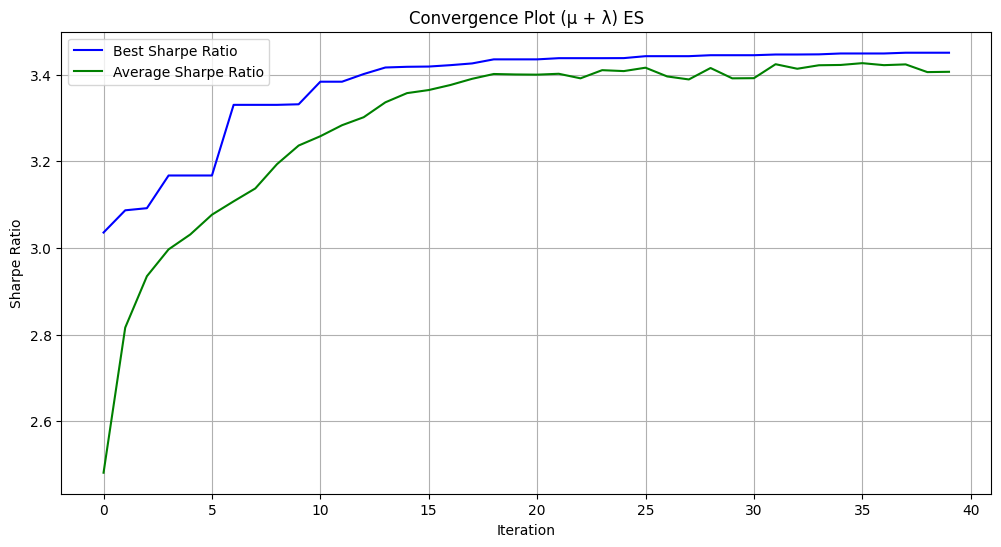

In [ ]:

class MuPlusLambdaES:
    """
    Version 5: (μ + λ) Evolutionary Strategy
    - Selection from union of parent and offspring populations
    - Natural elitism through parent survival
    - Focus on maximizing returns via fitness function
    """
    def __init__(self, mu: int, lambda_: int, n_iterations: int):
        """
        Initialize ES parameters
        mu: parent population size
        lambda_: offspring population size
        """
        self.mu = mu  # Parent population size
        self.lambda_ = lambda_  # Number of offspring
        self.n_iterations = n_iterations
        # Track metrics
        self.convergence_history = []
        self.best_sharpe_history = []
        self.avg_sharpe_history = []

    def optimize(self):
        # Step 1: Generate initial parent population
        parents = np.array([chromosome(20) for _ in range(self.mu)])
        best_solution = None
        best_fitness = float('-inf')

        for iteration in range(self.n_iterations):
            # Step 2: Create λ offspring via mutation and recombination
            offspring = np.zeros((self.lambda_, 20))
            for i in range(self.lambda_):
                if np.random.random() < 0.5:  # 50% chance for each operator
                    # Create offspring through recombination
                    parent_indices = np.random.choice(self.mu, 2, replace=False)
                    parent1, parent2 = parents[parent_indices]
                    alpha = np.random.random()
                    child = alpha * parent1 + (1 - alpha) * parent2
                    child = child / child.sum()
                else:
                    # Create offspring through mutation
                    parent = parents[np.random.choice(self.mu)].copy()
                    child = mutation(parent)
                offspring[i] = child

            # Step 3: Combine parents and offspring for selection
            # This is the key (μ + λ) feature: selecting from both populations
            combined_population = np.vstack([parents, offspring])  # Union of parents and offspring
            combined_fitness = np.array([fitness_fuction(ind) for ind in combined_population])

            # Calculate current generation metrics
            best_idx = np.argmax(combined_fitness)
            best_ind = combined_population[best_idx]
            returns = mean_portfolio_return(best_ind)
            risk = np.sqrt(var_portfolio_return(best_ind))

            print(f"Iteration: {iteration}")
            print(f"Expected returns of {returns:.4f} with risk of {risk:.4f}, Sharpe: {combined_fitness[best_idx]:.4f}")

            # Step 4: Select top μ individuals from the combined population
            # This naturally implements elitism as parents can survive if they're good enough
            top_indices = np.argsort(combined_fitness)[-self.mu:]  # Select best μ individuals
            parents = combined_population[top_indices]  # New parent population

            # Track metrics
            self.convergence_history.append(np.mean(combined_fitness))
            self.best_sharpe_history.append(np.max(combined_fitness))
            self.avg_sharpe_history.append(np.mean(combined_fitness))

            # Update best solution
            current_best = np.max(combined_fitness)
            if current_best > best_fitness:
                best_fitness = current_best
                best_solution = combined_population[best_idx]

        self._print_final_portfolio(best_solution)
        return best_solution, best_fitness

    def _print_final_portfolio(self, portfolio):
        print("\nFinal Portfolio Details (μ + λ):")
        print("Portfolio weights:")
        for i, weight in enumerate(portfolio):
            print(f"Stock {i+1}: {weight:.6f}")

        final_returns = mean_portfolio_return(portfolio)
        final_risk = np.sqrt(var_portfolio_return(portfolio))
        final_sharpe = fitness_fuction(portfolio)

        print(f"\nFinal Expected returns: {final_returns:.6f}")
        print(f"Final Expected risk: {final_risk:.6f}")
        print(f"Final Sharpe Ratio: {final_sharpe:.6f}")

    def plot_convergence(self):
        plt.figure(figsize=(12, 6))
        plt.plot(range(self.n_iterations), self.best_sharpe_history,
                label='Best Sharpe Ratio', color='blue')
        plt.plot(range(self.n_iterations), self.avg_sharpe_history,
                label='Average Sharpe Ratio', color='green')
        plt.title('Convergence Plot (μ + λ) ES')
        plt.xlabel('Iteration')
        plt.ylabel('Sharpe Ratio')
        plt.legend()
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    # Example parameters
    mu = 30      # Parent population size
    lambda_ = 60 # Offspring population size
    n_iterations = 40

    # Run optimization
    es5 = MuPlusLambdaES(mu, lambda_, n_iterations)
    best_solution, best_fitness = es5.optimize()
    es5.plot_convergence()

## Version 6 : (μ, λ) Evolutionary Strategies

In [ ]:
class MuCommaLambdaES:
    """
    Version 6: (μ, λ) Evolution Strategy
    Selection only from offspring population with enhanced pressure
    """
    def __init__(self, mu, lambda_, n_iterations):
        self.mu = mu
        self.lambda_ = lambda_
        self.n_iterations = n_iterations
        self.convergence_history = []
        self.best_sharpe_history = []
        self.avg_sharpe_history = []
        self.diversity_history = []

    def optimize(self):
        # Initialize parent population
        parents = np.array([chromosome(20) for _ in range(self.mu)])
        best_solution = None
        best_fitness = float('-inf')

        # Adaptive parameters for increased pressure
        mutation_rate = 0.1
        success_history = []

        for iteration in range(self.n_iterations):
            # Calculate parent fitness for selection pressure
            parent_fitness = np.array([fitness_fuction(p) for p in parents])

            # Generate offspring with enhanced selection pressure
            offspring = np.zeros((self.lambda_, 20))

            for i in range(self.lambda_):
                if np.random.random() < 0.7:  # Higher probability of using selection pressure
                    # Tournament selection for first parent
                    tournament_size = 3
                    indices = np.random.choice(self.mu, tournament_size, replace=False)
                    tournament_fitness = parent_fitness[indices]
                    parent1 = parents[indices[np.argmax(tournament_fitness)]]

                    # Fitness proportionate selection for second parent
                    probs = np.exp(parent_fitness) / np.sum(np.exp(parent_fitness))
                    parent2 = parents[np.random.choice(self.mu, p=probs)]

                    # Adaptive recombination based on fitness
                    weight = parent_fitness[indices[np.argmax(tournament_fitness)]] / \
                            (np.sum(parent_fitness[indices]) + 1e-10)
                    child = weight * parent1 + (1 - weight) * parent2
                else:
                    # Mutation with adaptive rate
                    parent = parents[np.random.choice(self.mu)]
                    child = parent.copy()
                    mutation = np.random.normal(0, mutation_rate, size=20)
                    child = child + mutation

                child = np.maximum(0, child)
                offspring[i] = child / np.sum(child)

            # Evaluate offspring
            offspring_fitness = np.array([fitness_fuction(ind) for ind in offspring])

            # Calculate metrics for current generation
            best_idx = np.argmax(offspring_fitness)
            best_ind = offspring[best_idx]
            returns = mean_portfolio_return(best_ind)
            risk = np.sqrt(var_portfolio_return(best_ind))

            print(f"Iteration: {iteration}")
            print(f"Expected returns of {returns:.4f} with risk of {risk:.4f}, Sharpe: {offspring_fitness[best_idx]:.4f}")

            # Select top μ individuals ONLY from offspring
            top_indices = np.argsort(offspring_fitness)[-self.mu:]
            new_parents = offspring[top_indices]

            # Update success rate and adaptation
            success = np.mean(offspring_fitness) > np.mean(parent_fitness)
            success_history.append(success)
            if len(success_history) > 10:
                success_history.pop(0)
                mutation_rate *= 1.1 if np.mean(success_history) > 0.2 else 0.9
                mutation_rate = np.clip(mutation_rate, 0.01, 0.5)

            # Replace parents completely
            parents = new_parents

            # Track metrics
            self.convergence_history.append(np.mean(offspring_fitness))
            self.best_sharpe_history.append(np.max(offspring_fitness))
            self.avg_sharpe_history.append(np.mean(offspring_fitness))
            self.diversity_history.append(np.mean([np.std(offspring[:, i]) for i in range(20)]))

            # Update best solution
            current_best = np.max(offspring_fitness)
            if current_best > best_fitness:
                best_fitness = current_best
                best_solution = offspring[best_idx]

        # Print final portfolio details
        self._print_final_portfolio(best_solution)
        return best_solution, best_fitness

    def _print_final_portfolio(self, portfolio):
        print("\nFinal Portfolio Details (μ, λ):")
        print("Portfolio weights:")
        for i, weight in enumerate(portfolio):
            print(f"Stock {i+1}: {weight:.6f}")

        final_returns = mean_portfolio_return(portfolio)
        final_risk = np.sqrt(var_portfolio_return(portfolio))
        final_sharpe = fitness_fuction(portfolio)

        print(f"\nFinal Expected returns: {final_returns:.6f}")
        print(f"Final Expected risk: {final_risk:.6f}")
        print(f"Final Sharpe Ratio: {final_sharpe:.6f}")

    def plot_convergence(self):
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

        # Plot 1: Convergence
        ax1.plot(range(self.n_iterations), self.best_sharpe_history,
                label='Best Sharpe Ratio', color='blue')
        ax1.plot(range(self.n_iterations), self.avg_sharpe_history,
                label='Average Sharpe Ratio', color='green')
        ax1.set_title('Convergence Plot (μ, λ) ES')
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Sharpe Ratio')
        ax1.legend()
        ax1.grid(True)

        # Plot 2: Population Diversity
        ax2.plot(range(self.n_iterations), self.diversity_history,
                label='Population Diversity', color='red')
        ax2.set_title('Population Diversity')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Diversity Measure')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()


Running Version 5 (μ + λ) ES...
Iteration: 0
Expected returns of 0.1866 with risk of 0.0562, Sharpe: 3.2595
Iteration: 1
Expected returns of 0.1884 with risk of 0.0562, Sharpe: 3.2951
Iteration: 2
Expected returns of 0.1854 with risk of 0.0552, Sharpe: 3.2995
Iteration: 3
Expected returns of 0.1999 with risk of 0.0589, Sharpe: 3.3408
Iteration: 4
Expected returns of 0.1875 with risk of 0.0549, Sharpe: 3.3563
Iteration: 5
Expected returns of 0.1832 with risk of 0.0533, Sharpe: 3.3746
Iteration: 6
Expected returns of 0.1829 with risk of 0.0529, Sharpe: 3.3971
Iteration: 7
Expected returns of 0.1827 with risk of 0.0527, Sharpe: 3.4051
Iteration: 8
Expected returns of 0.1828 with risk of 0.0527, Sharpe: 3.4052
Iteration: 9
Expected returns of 0.1823 with risk of 0.0523, Sharpe: 3.4208
Iteration: 10
Expected returns of 0.1823 with risk of 0.0523, Sharpe: 3.4208
Iteration: 11
Expected returns of 0.1737 with risk of 0.0495, Sharpe: 3.4405
Iteration: 12
Expected returns of 0.1737 with risk of

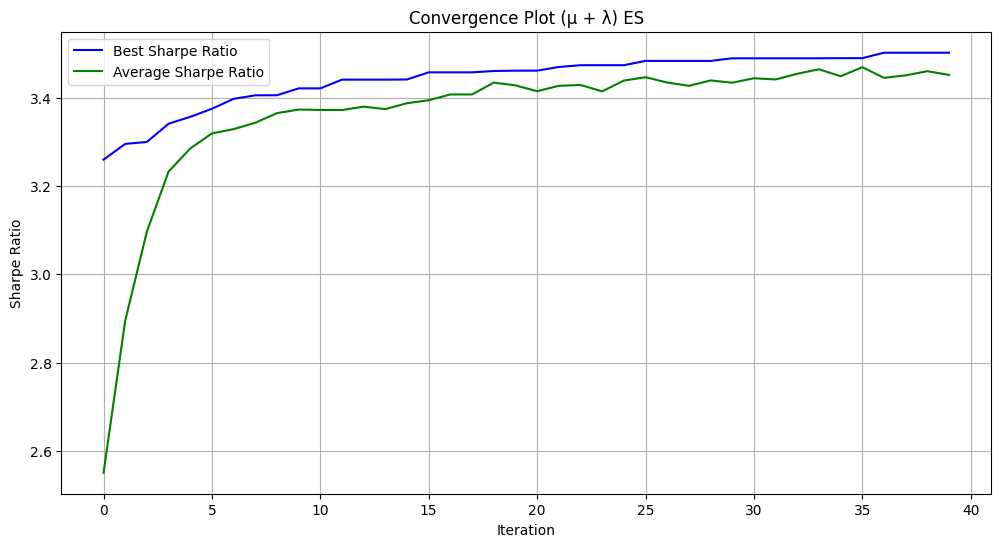


Running Version 6 (μ, λ) ES...
Iteration: 0
Expected returns of 0.1868 with risk of 0.0574, Sharpe: 3.2001
Iteration: 1
Expected returns of 0.2034 with risk of 0.0585, Sharpe: 3.4228
Iteration: 2
Expected returns of 0.2034 with risk of 0.0585, Sharpe: 3.4228
Iteration: 3
Expected returns of 0.2027 with risk of 0.0589, Sharpe: 3.3867
Iteration: 4
Expected returns of 0.1987 with risk of 0.0584, Sharpe: 3.3485
Iteration: 5
Expected returns of 0.2252 with risk of 0.0660, Sharpe: 3.3624
Iteration: 6
Expected returns of 0.2075 with risk of 0.0606, Sharpe: 3.3691
Iteration: 7
Expected returns of 0.2075 with risk of 0.0607, Sharpe: 3.3673
Iteration: 8
Expected returns of 0.2073 with risk of 0.0606, Sharpe: 3.3643
Iteration: 9
Expected returns of 0.2073 with risk of 0.0606, Sharpe: 3.3643
Iteration: 10
Expected returns of 0.2071 with risk of 0.0606, Sharpe: 3.3642
Iteration: 11
Expected returns of 0.2071 with risk of 0.0606, Sharpe: 3.3642
Iteration: 12
Expected returns of 0.2070 with risk of 

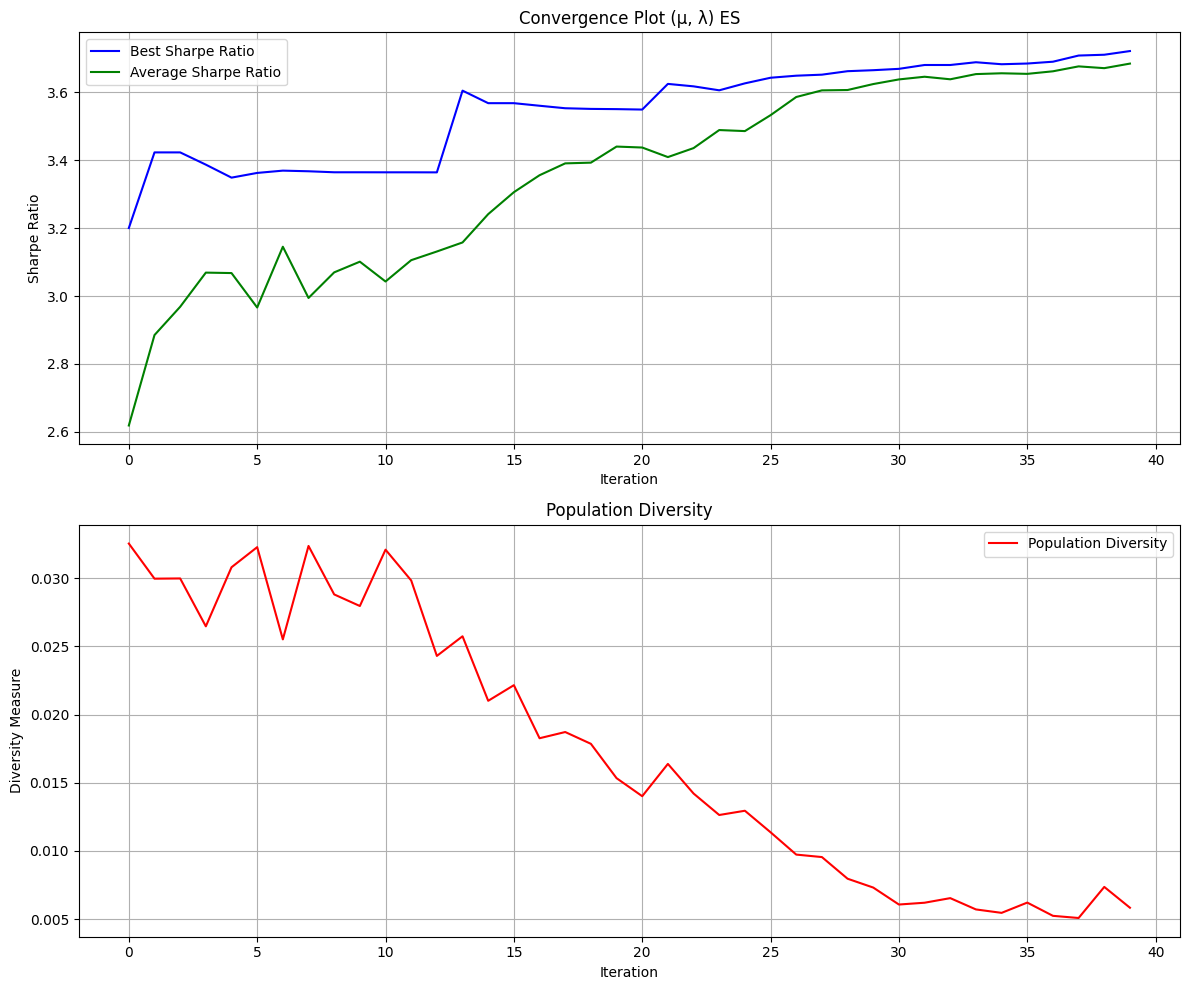


Comparison Summary:
Version 5 (μ + λ) Best Sharpe: 3.501475
Version 6 (μ, λ) Best Sharpe: 3.721189


In [ ]:
def run_comparison(mu=30, lambda_=60, n_iterations=40):
    """Run and compare both ES versions"""

    # Run Version 5 (μ + λ)
    print("\nRunning Version 5 (μ + λ) ES...")
    es5 = MuPlusLambdaES(mu, lambda_, n_iterations)
    best_solution5, best_fitness5 = es5.optimize()
    es5.plot_convergence()

    # Run Version 6 (μ, λ)
    print("\nRunning Version 6 (μ, λ) ES...")
    es6 = MuCommaLambdaES(mu, lambda_, n_iterations)
    best_solution6, best_fitness6 = es6.optimize()
    es6.plot_convergence()

    # Compare results
    print("\nComparison Summary:")
    print(f"Version 5 (μ + λ) Best Sharpe: {best_fitness5:.6f}")
    print(f"Version 6 (μ, λ) Best Sharpe: {best_fitness6:.6f}")

    return best_solution5, best_solution6

if __name__ == "__main__":
    best_portfolio5, best_portfolio6 = run_comparison()